In [1154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import geopy
import math
import plotly.graph_objects as go
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [1155]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372","#d62728"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

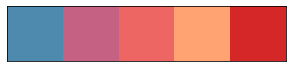

In [1156]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

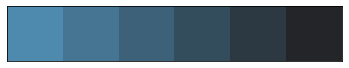

In [1157]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

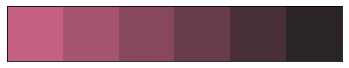

In [1158]:
kolkata = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(kolkata),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

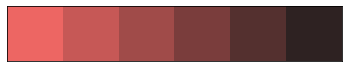

In [1159]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

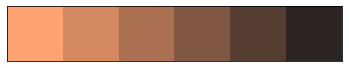

In [1160]:
delhi = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

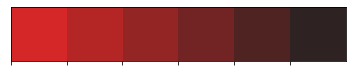

In [1161]:
bangalore = sns.dark_palette(custom_colors[4], reverse=True)
sns.palplot(sns.color_palette(bangalore),size=1)

In [1162]:
df1 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price data India\Mumbai.csv')
df2 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price data India\Kolkata.csv')
df3 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price data India\Chennai.csv')
df4 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price data India\Delhi.csv')
df5 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price data India\Bangalore.csv')

In [1163]:
df1.head(5)

Price  Area  Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  4850000   720  Kharghar                1       1                 1   
1  4500000   600  Kharghar                1       1                 1   
2  6700000   650  Kharghar                1       1                 1   
3  4500000   650  Kharghar                1       1                 1   
4  5000000   665  Kharghar                1       1                 1   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  0             1  ...   
2          1             1                  0             1  ...   
3          0             0                  1             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              1    0                1          0           0   0   
3              1    1                1          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         1             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [1164]:
df2.head(5)

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  2235000  1016      Barasat                3       0                 0   
1  3665999  1111    Keshtopur                2       0                 1   
2  3774000  1020     Rajarhat                2       0                 0   
3  2524000   935  Narendrapur                2       0                 0   
4  8300000  1956     New Town                3       1                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             0                  1             1  ...   
2          1             0                  0             0  ...   
3          1             1                  1             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                0          0           0   0   
1              0    0                0          0           0   0   
2              1    0                0          0           0   0   
3              0    0                0          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [1165]:
df3.head(5)

Price  Area        Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   5500000  1310   Perungalathur                3       0                 0   
1   5350000  1126      Madhavaram                2       0                 0   
2   8205000  1307      Karapakkam                3       0                 0   
3  23400000  3600  Thiruvidandhai                3       0                 0   
4  10100000  1700  Iyappanthangal                3       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  1             0  ...   
2          1             1                  1             1  ...   
3          1             1                  0             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              0    0                0          0           0   0   
1              1    0                0          0           0   0   
2              0    0                0          0           0   0   
3              0    0                0          0           0   0   
4              0    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [1166]:
df4.head(5)

Price  Area          Location  No. of Bedrooms  Resale  \
0  10500000  1200  Sector 10 Dwarka                2       1   
1   6000000  1000       Uttam Nagar                3       0   
2  15000000  1350      Sarita Vihar                2       1   
3   2500000   435       Uttam Nagar                2       0   
4   5800000   900        Dwarka Mor                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 0          1             0                  0             1   
1                 0          0             0                  0             0   
2                 0          0             0                  0             0   
3                 0          0             0                  0             0   
4                 0          0             0                  0             0   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                1          0           0   0   
1  ...              0    0                0          0           0   0   
2  ...              0    0                0          0           0   0   
3  ...              0    0                1          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [1167]:
df5.head(5)

Price  Area                         Location  No. of Bedrooms  Resale  \
0  30000000  3340                 JP Nagar Phase 1                4       0   
1   7888000  1045       Dasarahalli on Tumkur Road                2       0   
2   4866000  1179  Kannur on Thanisandra Main Road                2       0   
3   8358000  1675                     Doddanekundi                3       0   
4   6845000  1670                          Kengeri                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 1          1             1                  1             1   
1                 0          1             1                  1             1   
2                 0          1             1                  1             1   
3                 0          0             0                  0             0   
4                 1          1             1                  1             1   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                0          0           0   0   
1  ...              1    0                1          0           0   0   
2  ...              1    0                0          0           0   0   
3  ...              1    0                0          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [1168]:

print(f"Mumbai:{df1.info}\n")
print(f"Kolkata:{df2.info}\n")
print(f"Chennai:{df3.info}\n")
print(f"Delhi:{df4.info}\n")
print(f"Bangalore:{df5.info}\n")
      

Mumbai:<bound method DataFrame.info of          Price  Area        Location  No. of Bedrooms  Resale  \
0      4850000   720        Kharghar                1       1   
1      4500000   600        Kharghar                1       1   
2      6700000   650        Kharghar                1       1   
3      4500000   650        Kharghar                1       1   
4      5000000   665        Kharghar                1       1   
...        ...   ...             ...              ...     ...   
7714  14500000  1180  Mira Road East                2       0   
7715  14500000   530    Naigaon East                1       1   
7716   4100000   700        Shirgaon                1       0   
7717   2750000   995  Mira Road East                2       0   
7718   2750000  1020  Mira Road East                2       0   

      MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  \
0                    1          0             0                  0   
1                    1          1       

Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absence of information about the apartment but these values don't ascertain the absence of such a feature in real life.

We will be dropping these values so that they don't cloud our analysis.

In [1169]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)
df5.replace(9, np.nan, inplace=True)


In [1170]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()

In [1171]:
print(f"Mumbai:{df1.shape}\n")
print(f"Kolkata:{df2.shape}\n")
print(f"Chennai:{df3.shape}\n")
print(f"Delhi :{df4.shape}\n")
print(f"Bangalore:{df5.shape}\n")


Mumbai:(1398, 40)

Kolkata:(75, 40)

Chennai:(2233, 40)

Delhi :(2002, 40)

Bangalore:(1951, 40)



In [1172]:
df1.head().transpose()

0         1         2         3         4
Price                 4850000   4500000   6700000   4500000   5000000
Area                      720       600       650       650       665
Location             Kharghar  Kharghar  Kharghar  Kharghar  Kharghar
No. of Bedrooms             1         1         1         1         1
Resale                      1         1         1         1         1
MaintenanceStaff          1.0       1.0       1.0       1.0       1.0
Gymnasium                 0.0       1.0       1.0       0.0       0.0
SwimmingPool              0.0       1.0       1.0       0.0       0.0
LandscapedGardens         0.0       0.0       0.0       1.0       1.0
JoggingTrack              0.0       1.0       1.0       0.0       0.0
RainWaterHarvesting       0.0       1.0       1.0       1.0       1.0
IndoorGames               0.0       0.0       0.0       0.0       0.0
ShoppingMall              0.0       0.0       0.0       0.0       0.0
Intercom                  0.0       0.0       1.0       1.0       1.0
SportsFacility            0.0       0.0       0.0       0.0       0.0
ATM                       0.0       0.0       0.0       0.0       0.0
ClubHouse                 0.0       1.0       1.0       0.0       0.0
School                    0.0       0.0       0.0       0.0       0.0
24X7Security              1.0       1.0       1.0       1.0       1.0
PowerBackup               1.0       1.0       1.0       1.0       1.0
CarParking                1.0       1.0       1.0       1.0       1.0
StaffQuarter              0.0       1.0       1.0       1.0       0.0
Cafeteria                 0.0       0.0       0.0       0.0       0.0
MultipurposeRoom          0.0       0.0       0.0       0.0       0.0
Hospital                  0.0       0.0       0.0       0.0       0.0
WashingMachine            0.0       0.0       0.0       0.0       0.0
Gasconnection             0.0       0.0       0.0       0.0       0.0
AC                        0.0       0.0       0.0       1.0       0.0
Wifi                      0.0       0.0       0.0       1.0       0.0
Children'splayarea        0.0       0.0       1.0       0.0       0.0
LiftAvailable             1.0       1.0       1.0       1.0       1.0
BED                       0.0       0.0       0.0       1.0       0.0
VaastuCompliant           1.0       1.0       1.0       1.0       1.0
Microwave                 0.0       0.0       0.0       0.0       0.0
GolfCourse                0.0       0.0       0.0       0.0       0.0
TV                        0.0       0.0       0.0       0.0       0.0
DiningTable               0.0       0.0       0.0       0.0       0.0
Sofa                      0.0       0.0       0.0       0.0       0.0
Wardrobe                  0.0       0.0       0.0       1.0       0.0
Refrigerator              0.0       0.0       0.0       0.0       0.0

In [1173]:
df1.dtypes

Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED                    float64
VaastuCo

In [1174]:
df2.dtypes

Price                    int64
Area                     int64
Location                object
No. of Bedrooms        float64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED                    float64
VaastuCo

In [1175]:
df3.dtypes

Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED                    float64
VaastuCo

In [1176]:
df4.dtypes

Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED                    float64
VaastuCo

In [1177]:
df5.dtypes

Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED                    float64
VaastuCo

In [1178]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df1['Price']/100000
df3['Price'] = df1['Price']/100000
df4['Price'] = df1['Price']/100000
df5['Price'] = df1['Price']/100000


In [1179]:
df1.to_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Mumbai_updated.csv')
df2.to_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Kolkata_updated.csv')
df3.to_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Delhi_updated.csv')
df4.to_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Chennai_updated.csv')
df5.to_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Hyderabad_updated.csv')

In [1180]:
df1 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Mumbai_updated.csv')
df2 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Kolkata_updated.csv')
df3 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Delhi_updated.csv')
df4 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Chennai_updated.csv')
df5 = pd.read_csv(r'C:\Users\Arkaj\Downloads\House price updated india\Hyderabad_updated.csv')

In [1181]:
df1.head(5)

Unnamed: 0  Price  Area  Location  No. of Bedrooms  Resale  \
0           0   48.5   720  Kharghar                1       1   
1           1   45.0   600  Kharghar                1       1   
2           2   67.0   650  Kharghar                1       1   
3           3   45.0   650  Kharghar                1       1   
4           4   50.0   665  Kharghar                1       1   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  ...  \
0               1.0        0.0           0.0                0.0  ...   
1               1.0        1.0           1.0                0.0  ...   
2               1.0        1.0           1.0                0.0  ...   
3               1.0        0.0           0.0                1.0  ...   
4               1.0        0.0           0.0                1.0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse   TV  \
0            1.0  0.0              1.0        0.0         0.0  0.0   
1            1.0  0.0              1.0        0.0         0.0  0.0   
2            1.0  0.0              1.0        0.0         0.0  0.0   
3            1.0  1.0              1.0        0.0         0.0  0.0   
4            1.0  0.0              1.0        0.0         0.0  0.0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0          0.0   0.0       0.0           0.0  
1          0.0   0.0       0.0           0.0  
2          0.0   0.0       0.0           0.0  
3          0.0   0.0       1.0           0.0  
4          0.0   0.0       0.0           0.0  

[5 rows x 41 columns]

In [1182]:
df1 = df1.drop(['Unnamed: 0'], axis = 1) 
df2 = df2.drop(['Unnamed: 0'], axis = 1) 
df3 = df3.drop(['Unnamed: 0'], axis = 1) 
df4 = df4.drop(['Unnamed: 0'], axis = 1)
df5 = df5.drop(['Unnamed: 0'], axis = 1)

In [1183]:
df1.head()

Price  Area  Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   48.5   720  Kharghar                1       1               1.0   
1   45.0   600  Kharghar                1       1               1.0   
2   67.0   650  Kharghar                1       1               1.0   
3   45.0   650  Kharghar                1       1               1.0   
4   50.0   665  Kharghar                1       1               1.0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0        0.0           0.0                0.0           0.0  ...   
1        1.0           1.0                0.0           1.0  ...   
2        1.0           1.0                0.0           1.0  ...   
3        0.0           0.0                1.0           0.0  ...   
4        0.0           0.0                1.0           0.0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse   TV  \
0            1.0  0.0              1.0        0.0         0.0  0.0   
1            1.0  0.0              1.0        0.0         0.0  0.0   
2            1.0  0.0              1.0        0.0         0.0  0.0   
3            1.0  1.0              1.0        0.0         0.0  0.0   
4            1.0  0.0              1.0        0.0         0.0  0.0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0          0.0   0.0       0.0           0.0  
1          0.0   0.0       0.0           0.0  
2          0.0   0.0       0.0           0.0  
3          0.0   0.0       1.0           0.0  
4          0.0   0.0       0.0           0.0  

[5 rows x 40 columns]

In [1184]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

# Univariate Analysis

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



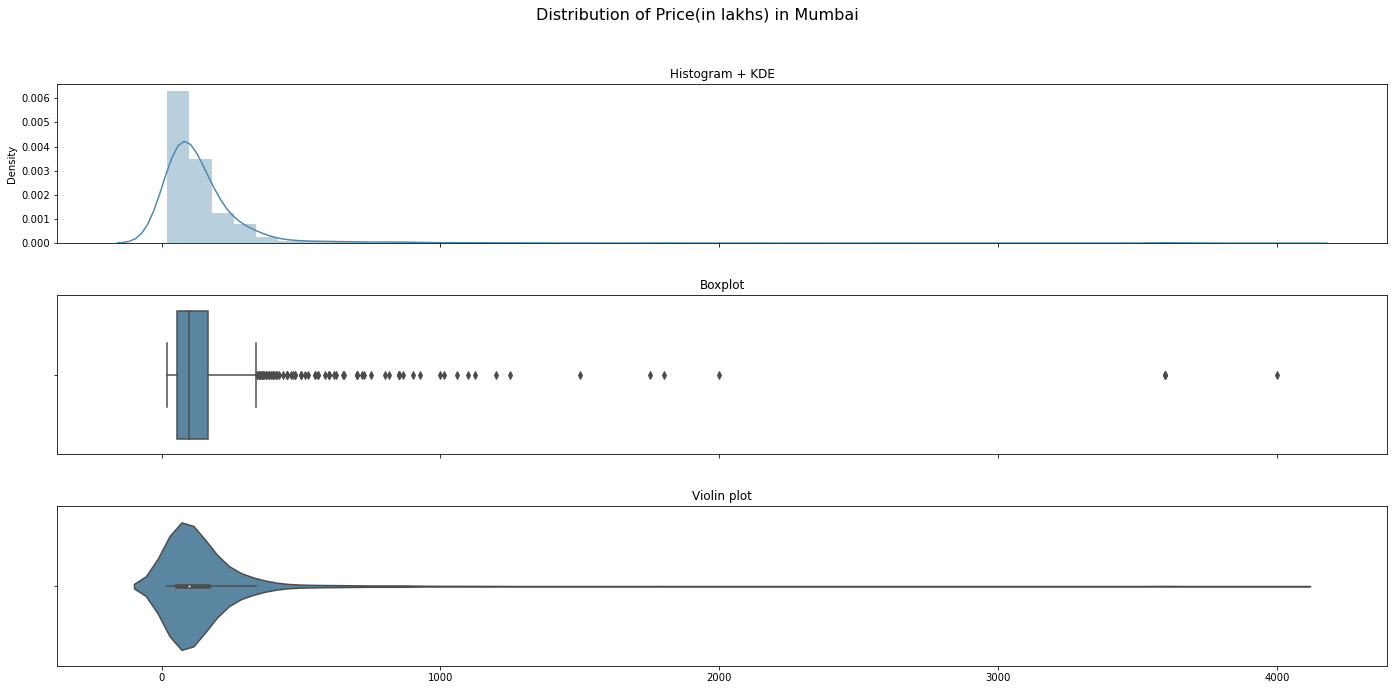

In [1185]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



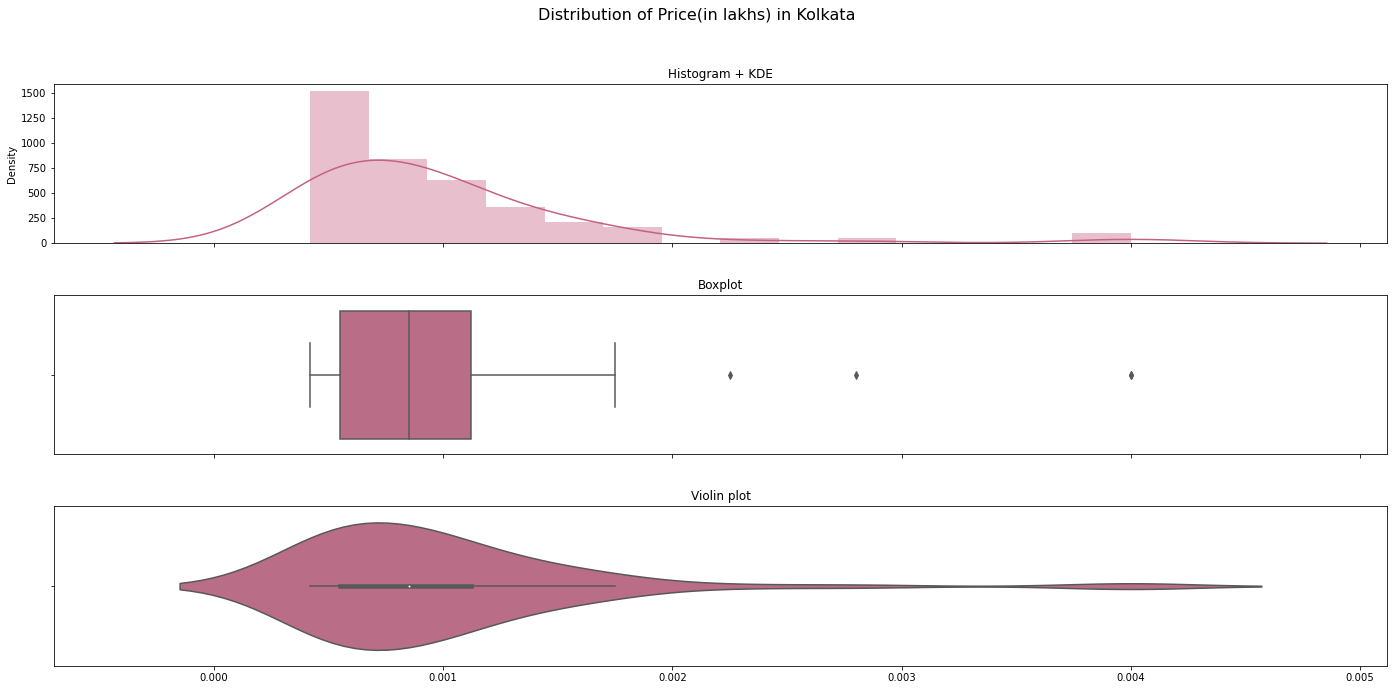

In [1186]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Kolkata',custom_colors[1])

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



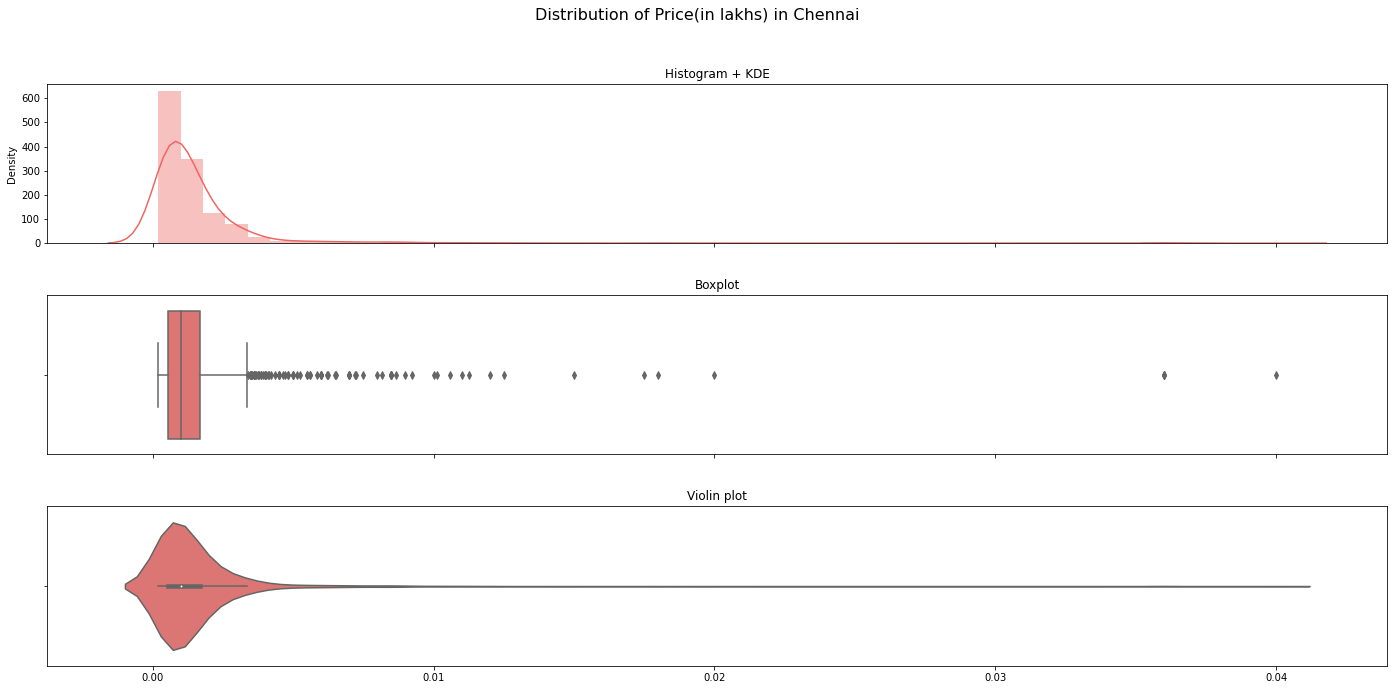

In [1187]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai',custom_colors[2])

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



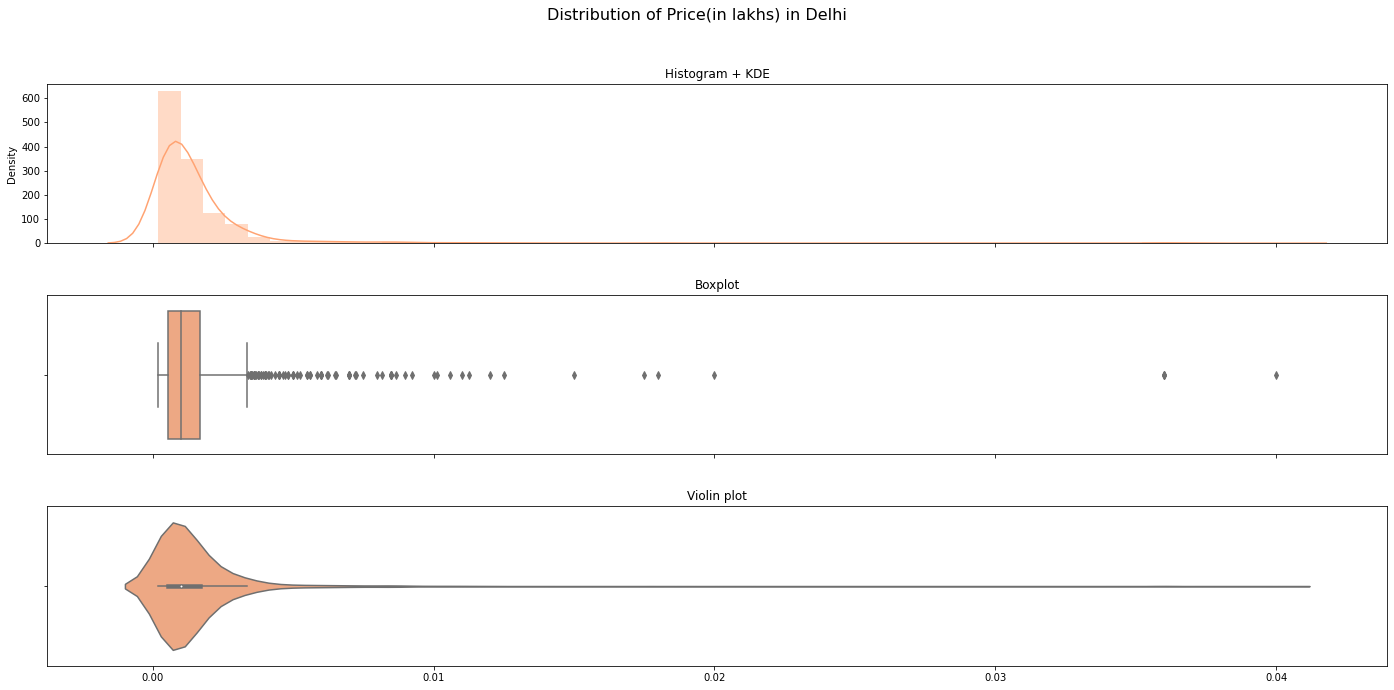

In [1188]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[3])

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Arkaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



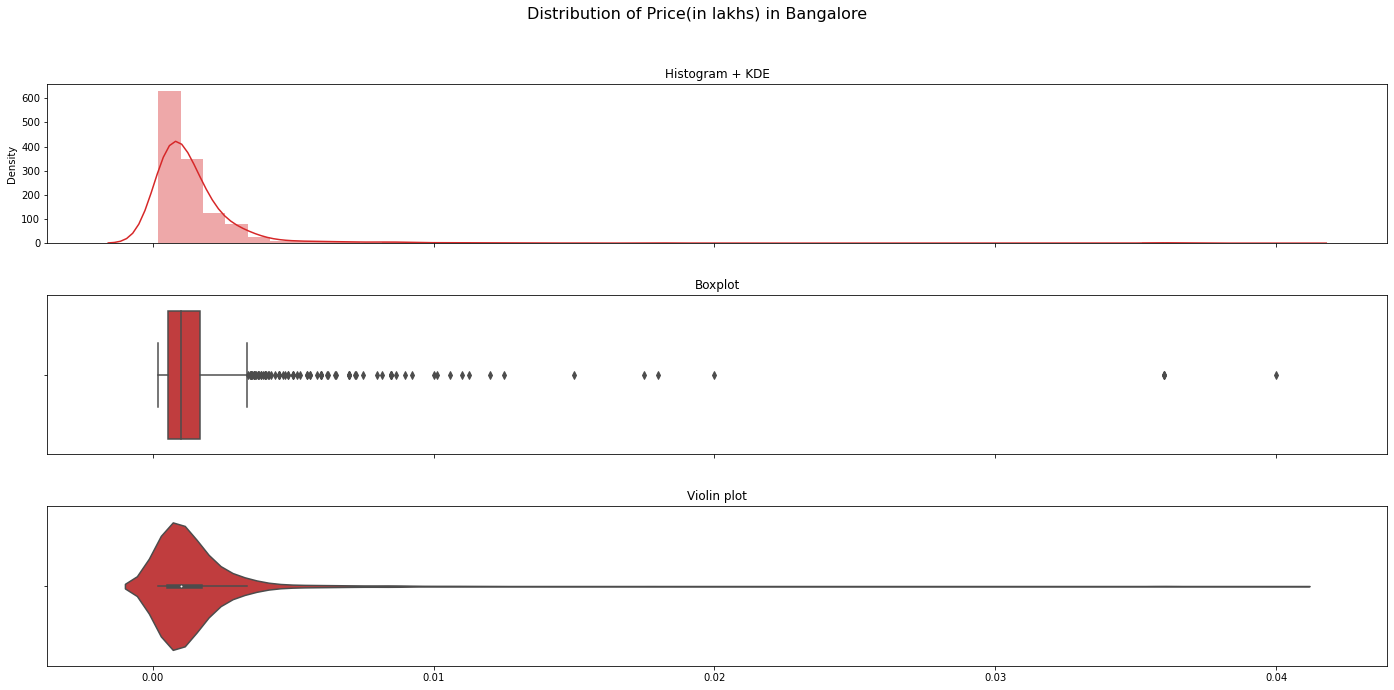

In [1189]:
triple_plot(df5['Price'],'Distribution of Price(in lakhs) in Bangalore',custom_colors[4])

In [1190]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

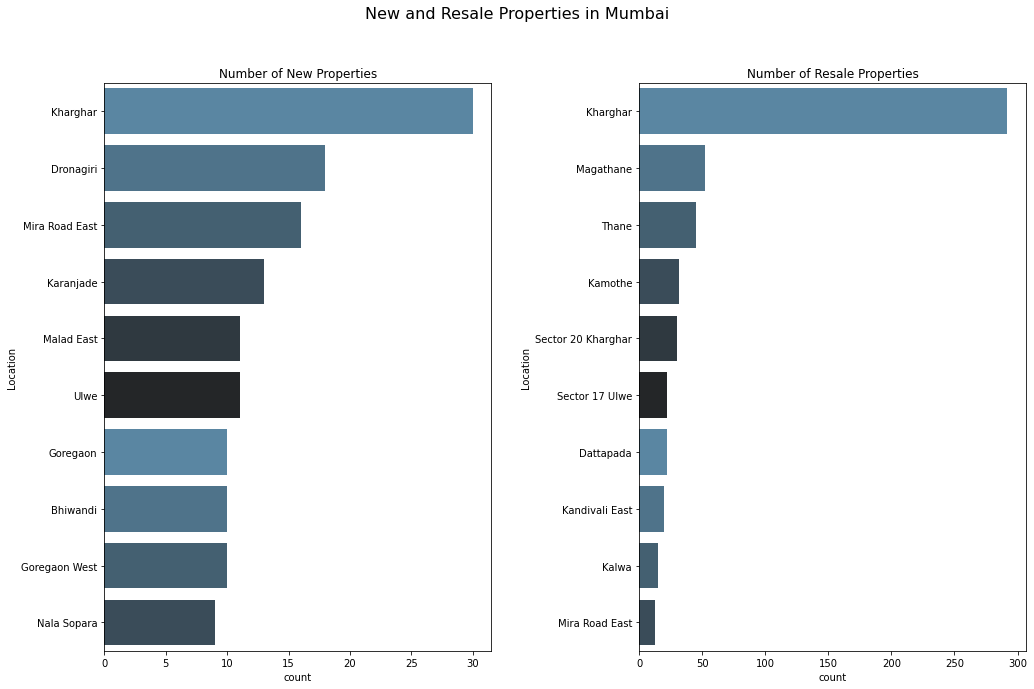

In [1191]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

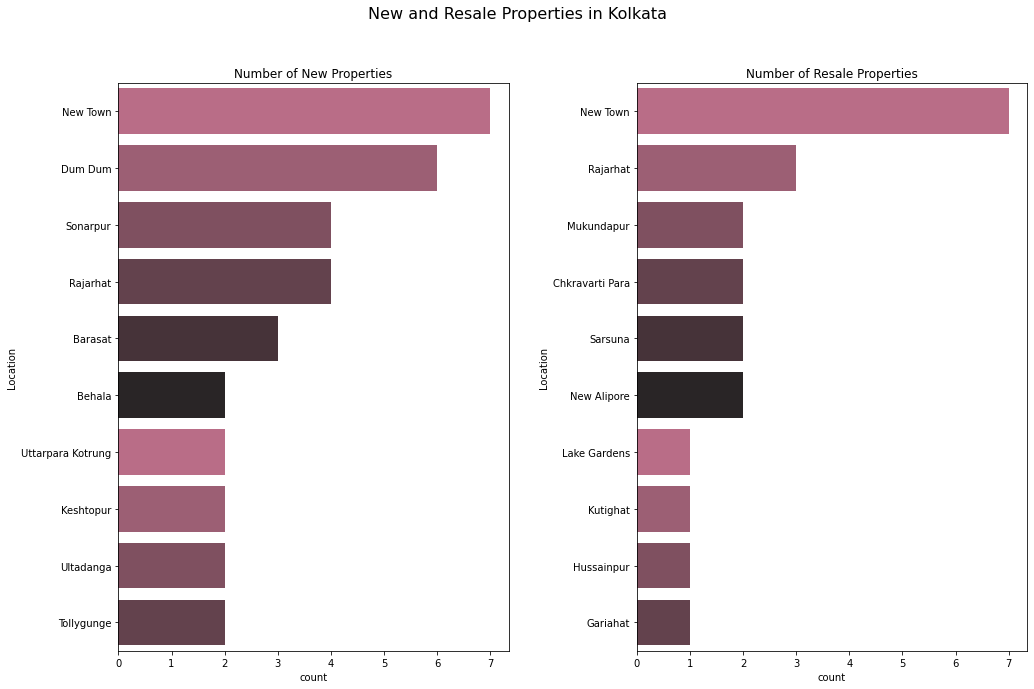

In [1192]:
count_plot(df2,'New and Resale Properties in Kolkata',kolkata)

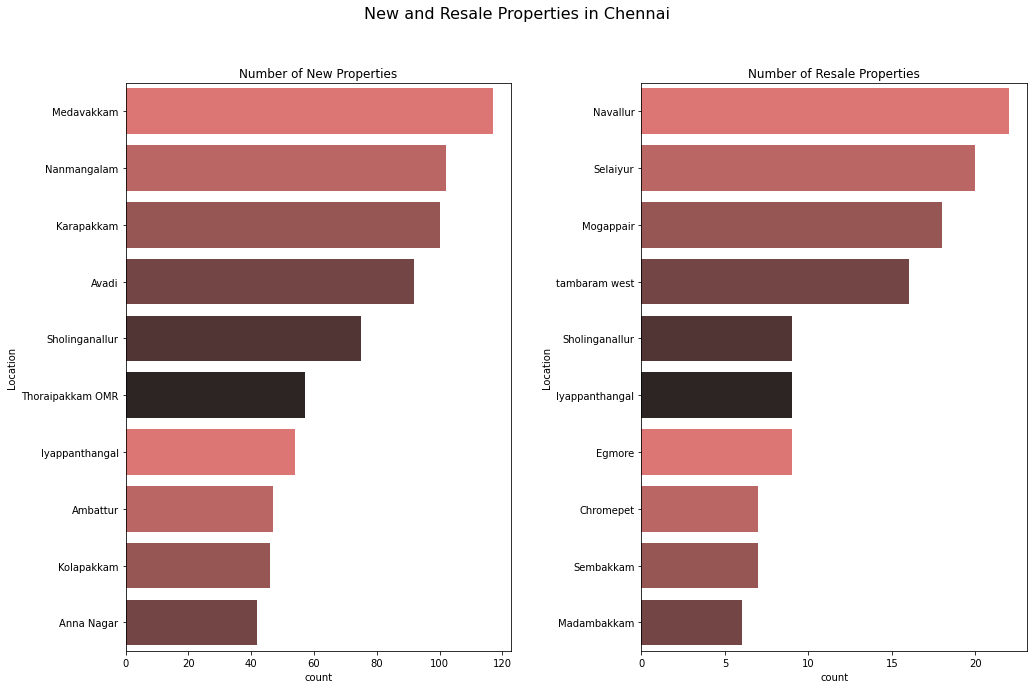

In [1193]:
count_plot(df3,'New and Resale Properties in Chennai',chennai)

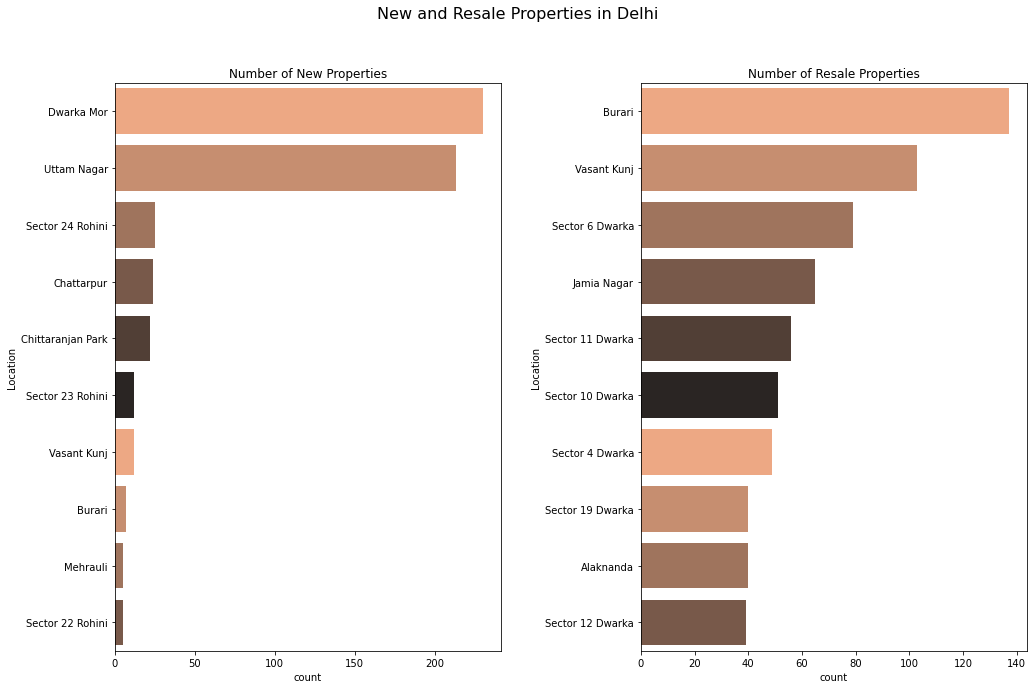

In [1194]:
count_plot(df4,'New and Resale Properties in Delhi',delhi)

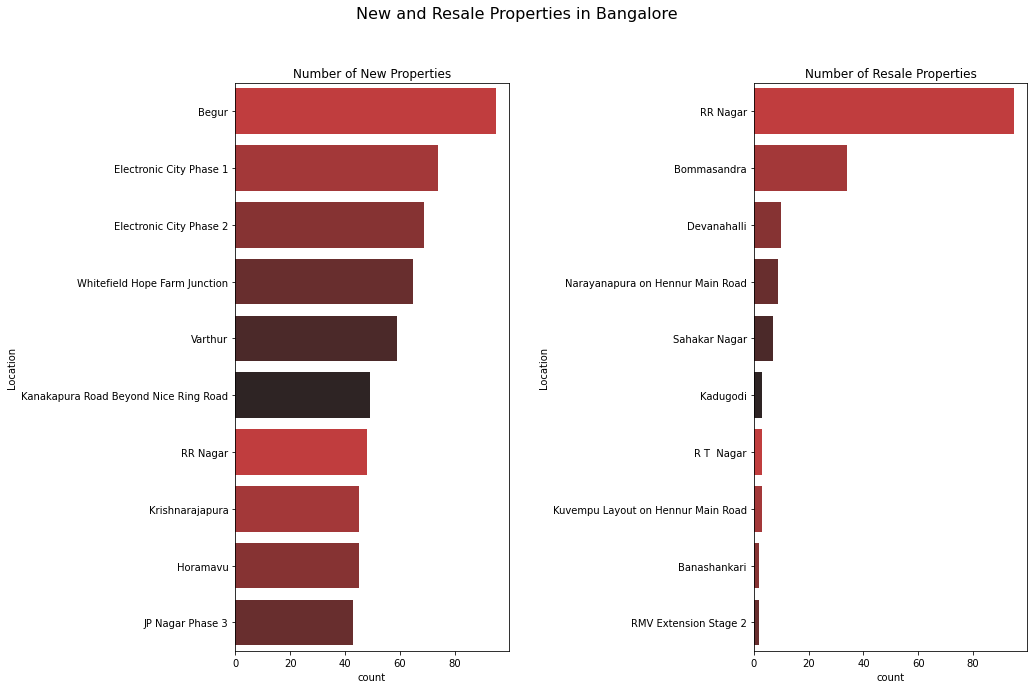

In [1195]:
count_plot(df5,'New and Resale Properties in Bangalore',bangalore)

# Bivariate Analysis

In [1196]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

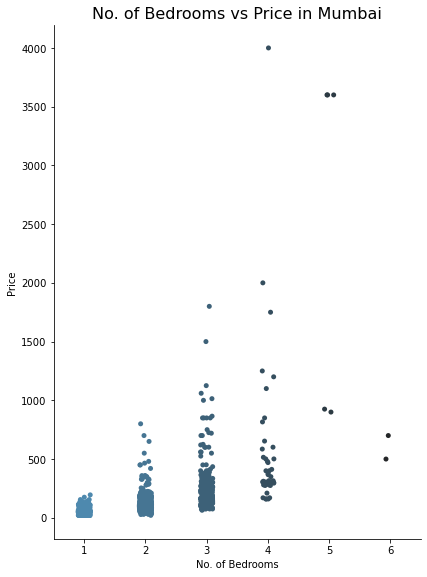

In [1197]:
cat_plot(df1,'Mumbai',mumbai)

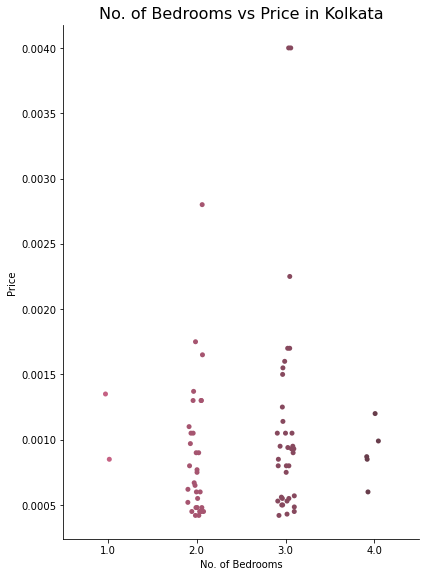

In [1198]:
cat_plot(df2,'Kolkata',kolkata)

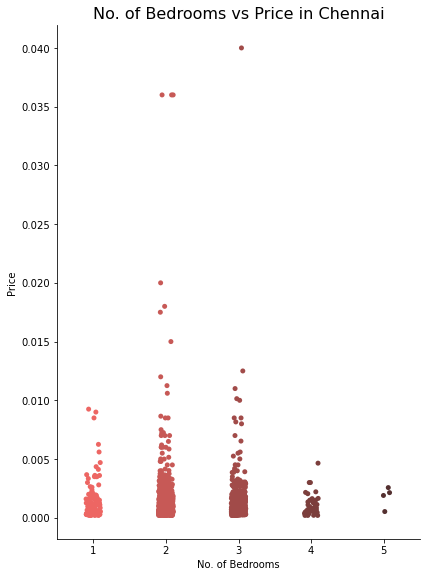

In [1199]:
cat_plot(df3,'Chennai',chennai)

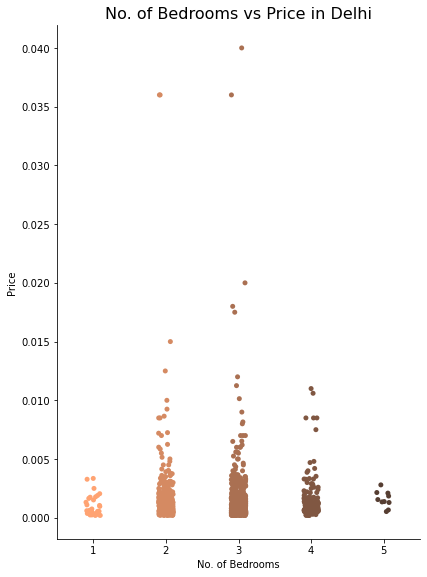

In [1200]:
cat_plot(df4,'Delhi',delhi)

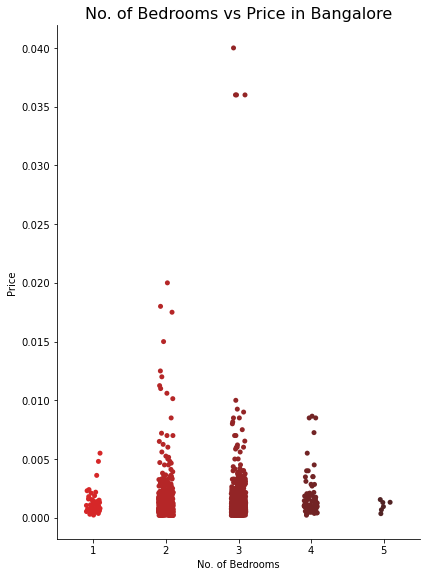

In [1201]:
cat_plot(df5,'Bangalore',bangalore)

In [1202]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(8,8)
    plt.show()

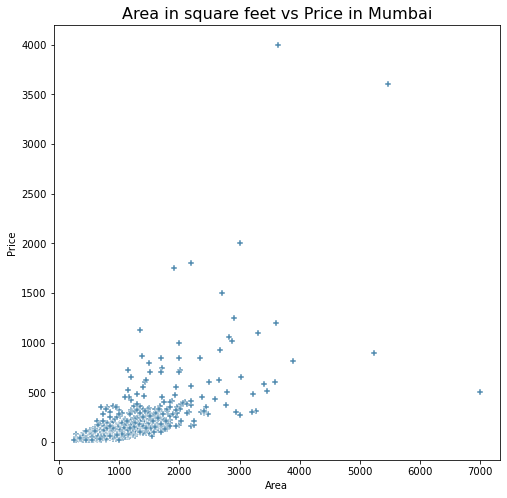

In [1203]:
scatter_plot(df1,'Mumbai',custom_colors[0])

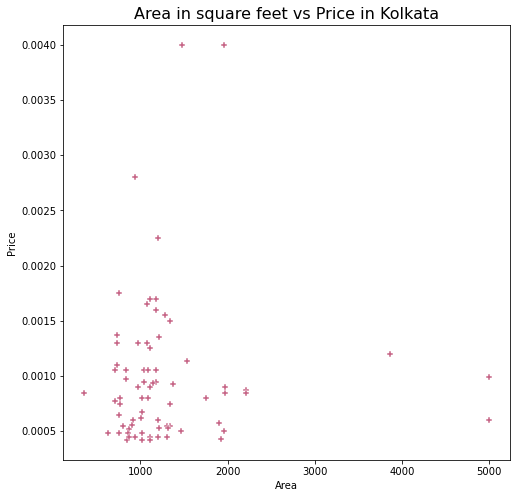

In [1204]:
scatter_plot(df2,'Kolkata',custom_colors[1])

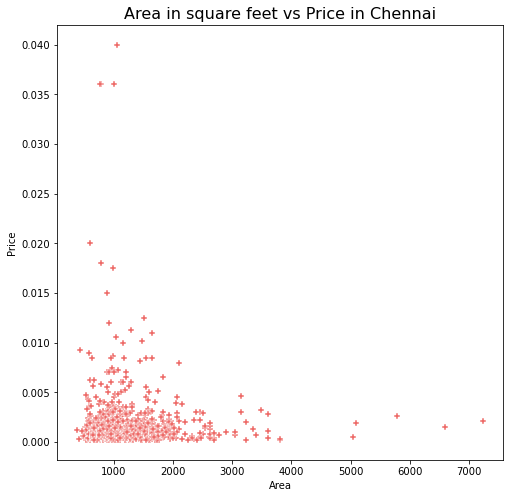

In [1205]:
scatter_plot(df3,'Chennai',custom_colors[2])

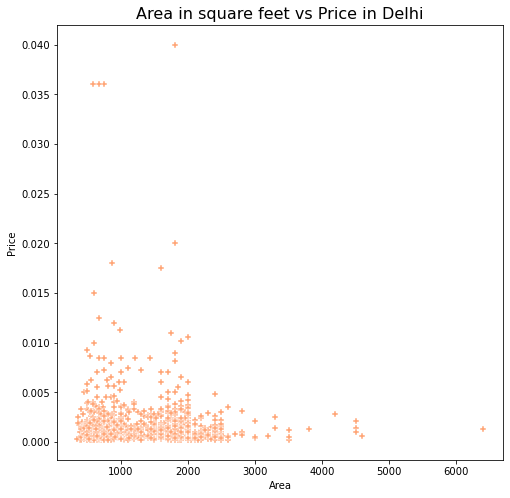

In [1206]:
scatter_plot(df4,'Delhi',custom_colors[3])

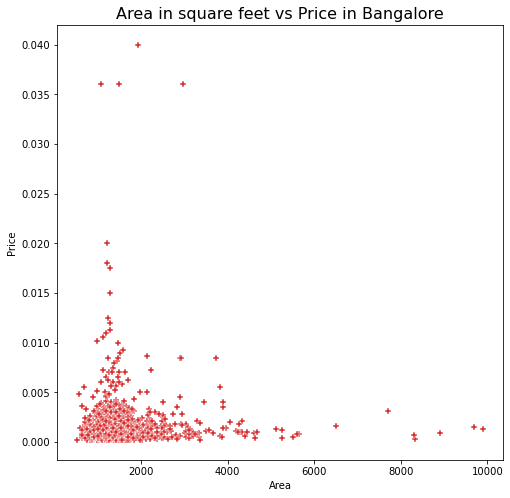

In [1207]:
scatter_plot(df5,'Bangalore',custom_colors[4])

In [1208]:
def scatter_plot1(data,title,c):
    sns.scatterplot(x="Location", y="Price", data=data,color=c,marker="P")
    plt.title('Location vs Price in '+ title,size=16)
    plt.xticks(rotation=70)
    plt.gcf().set_size_inches(70,10)
    plt.show()

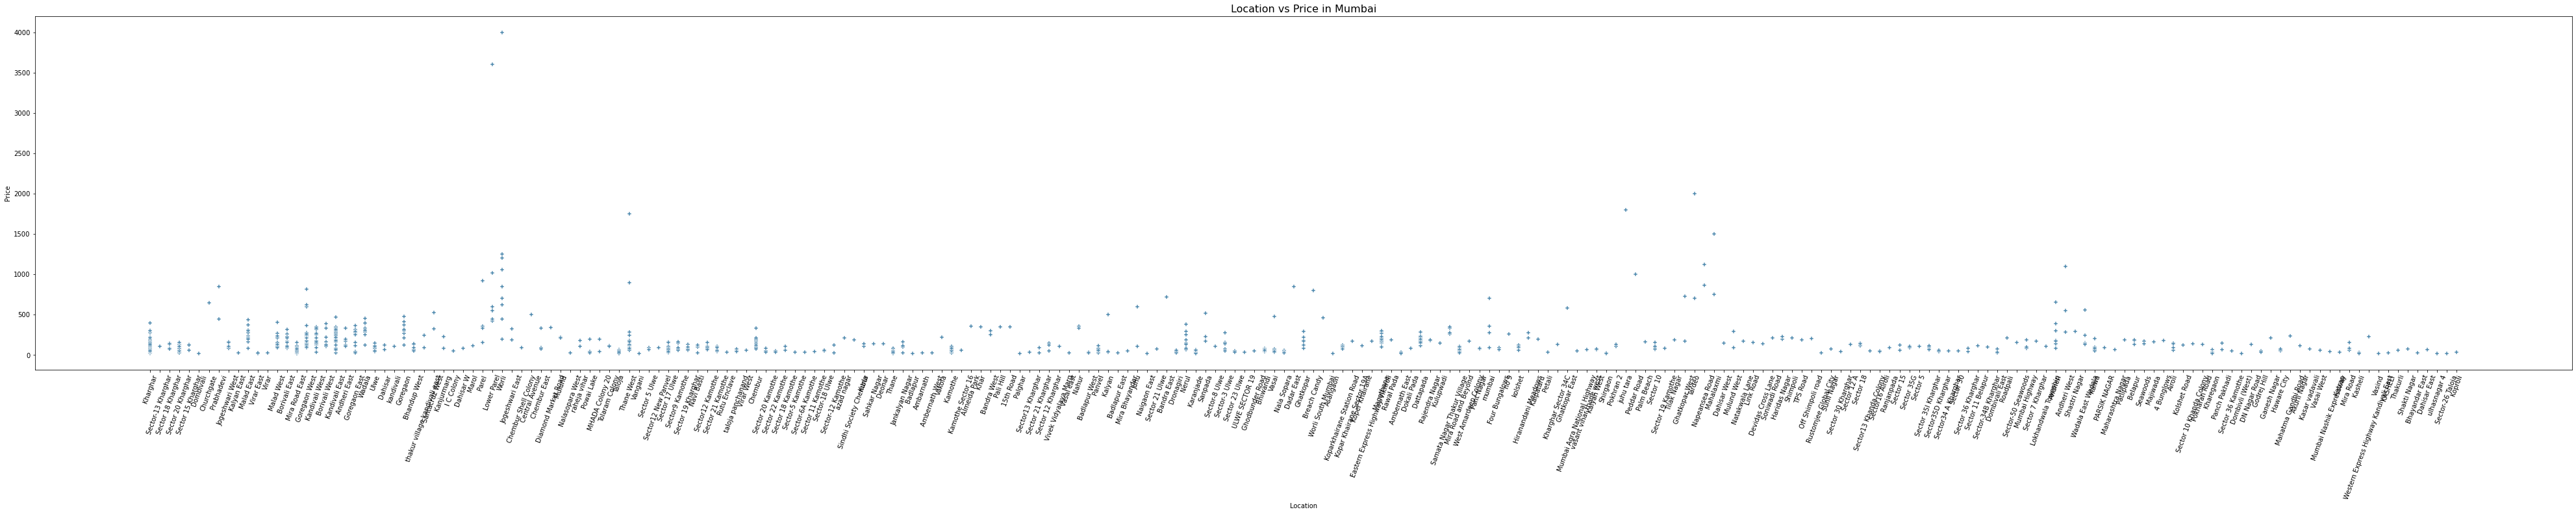

In [1209]:
scatter_plot1(df1,'Mumbai',custom_colors[0])

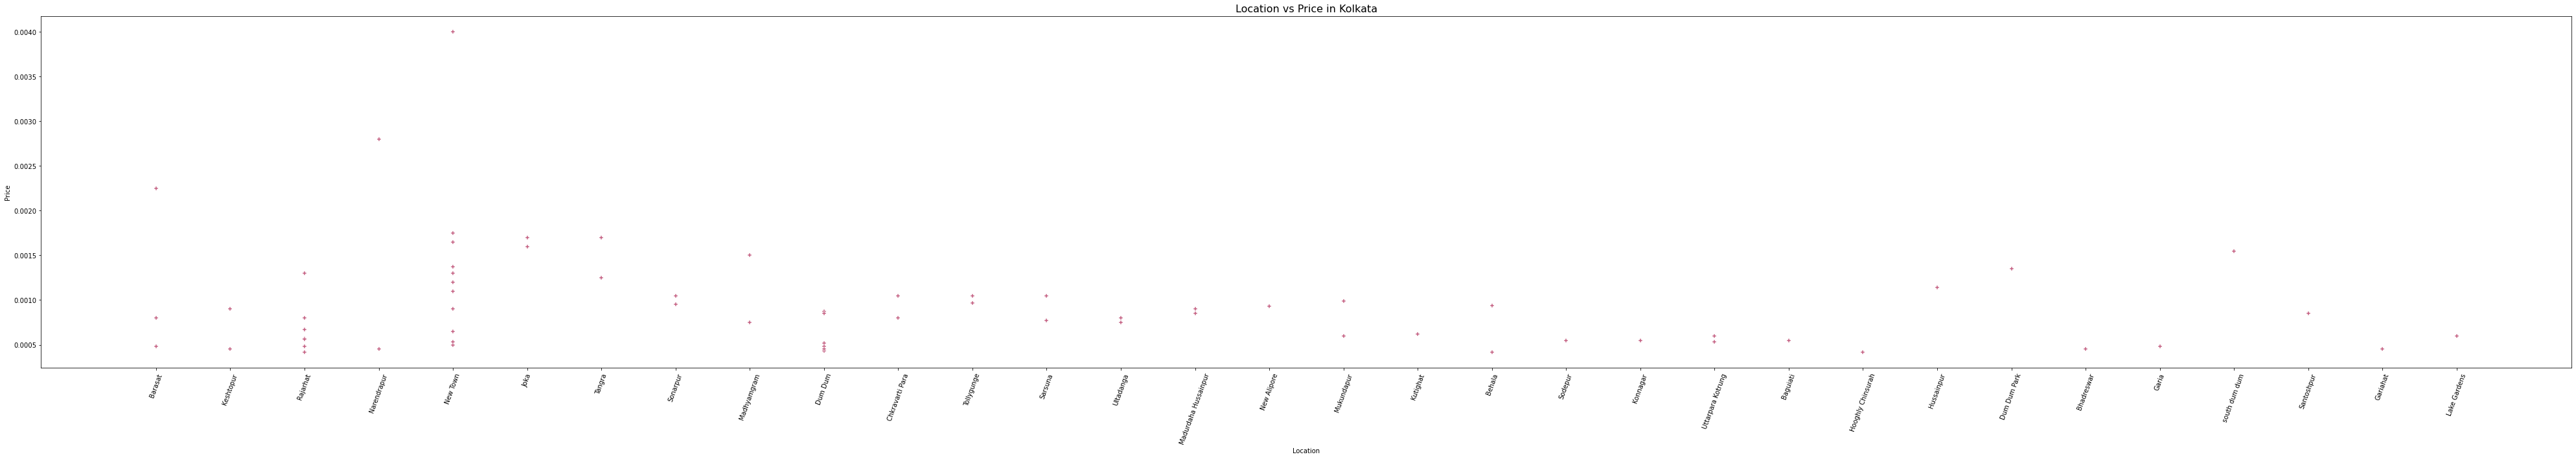

In [1210]:
scatter_plot1(df2,'Kolkata',custom_colors[1])

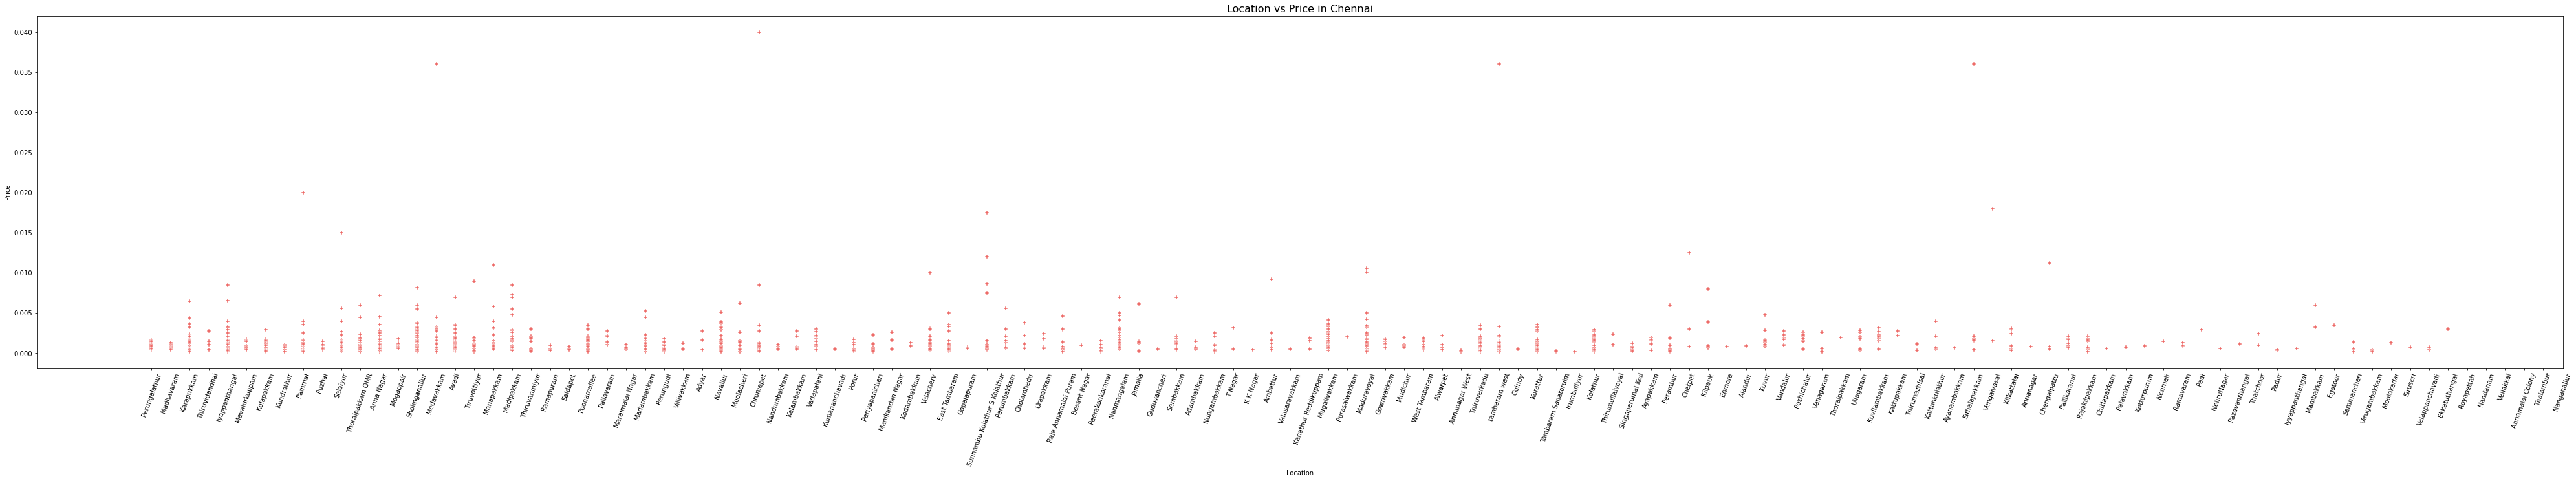

In [1211]:
scatter_plot1(df3,'Chennai',custom_colors[2])

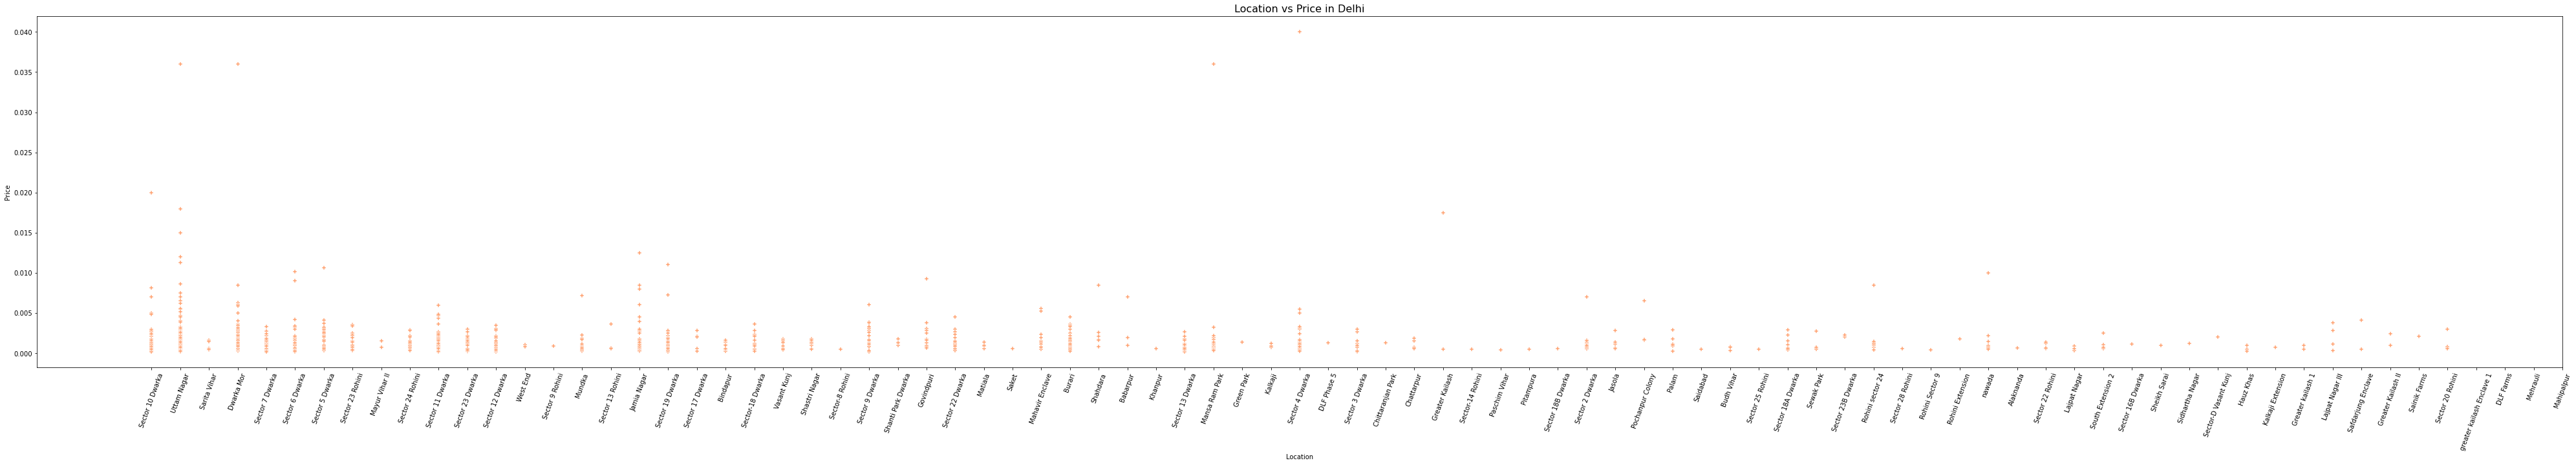

In [1212]:
scatter_plot1(df4,'Delhi',custom_colors[3])

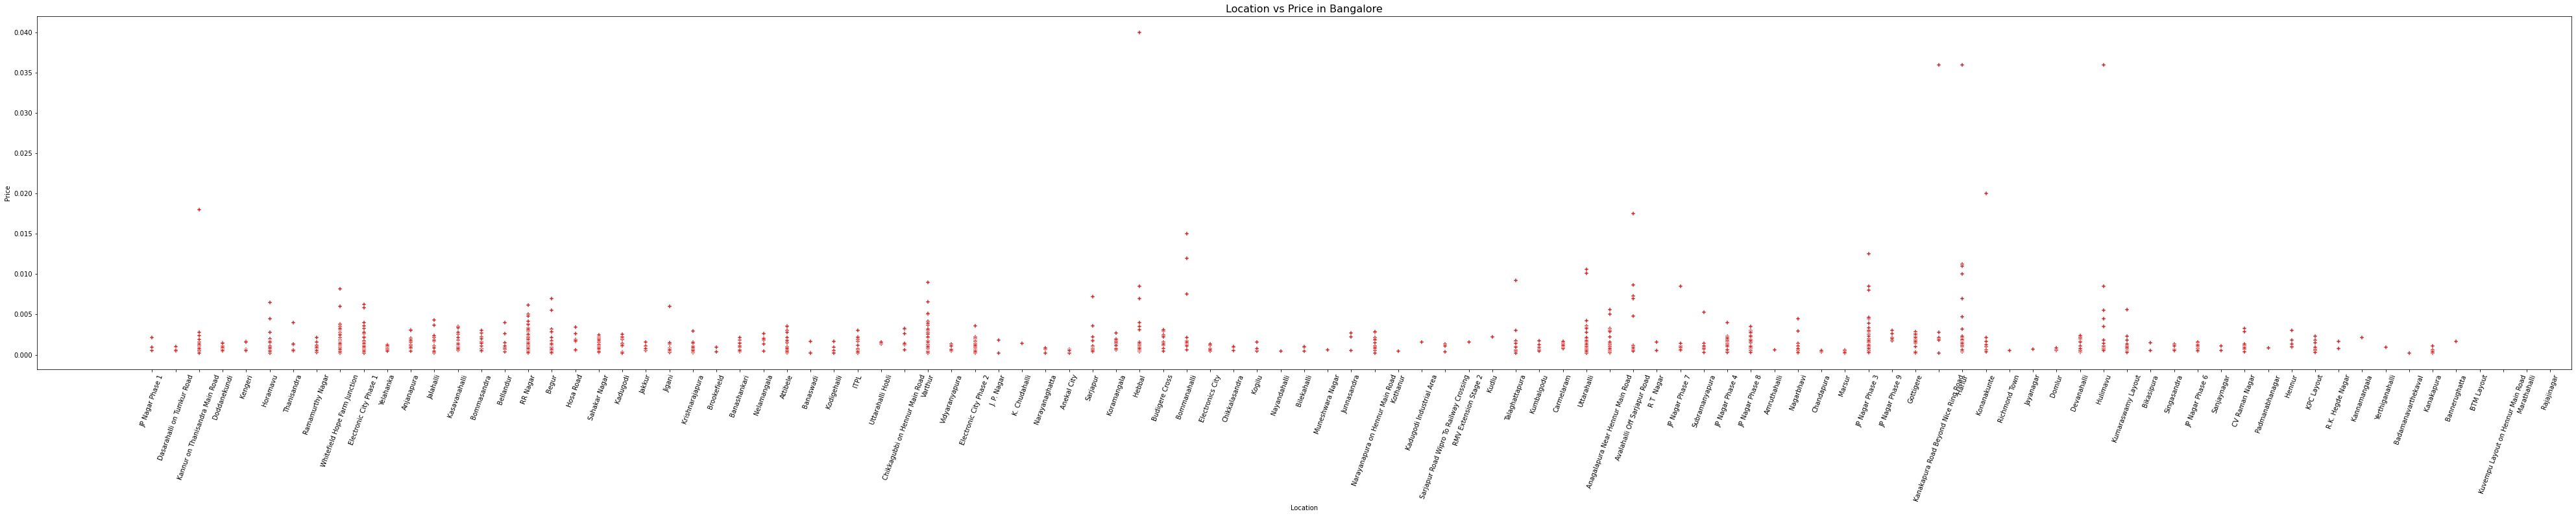

In [1213]:
scatter_plot1(df5,'Bangalore',custom_colors[4])

Amenities

In [1214]:
c1 = ["#4e89ae","#BFD5E2"]
c2 = ["#c56183","#E6BCCA"]
c3 = ["#ed6663","#F7BDBC"]
c4 = ["#ffa372","#FFDECC"]
c5 = ["#d62728","#E6BCCA"]

In [1215]:
def pie_chart(df,c,addAll = True):
    df = df.iloc [:,5:-2] 
    fig = go.Figure()
    for column in df.columns.to_list():
        val = df[column].value_counts().rename_axis('unique_values').reset_index(name='val_count')
        labels = val['unique_values']
        values = val['val_count']
        fig.add_trace(
            go.Pie(
                labels=labels, 
                values=values,
                marker_colors=c
            )
        )
        button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])


    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])
#     fig.add_layout_image(
#     dict(
#         source=link,
#         xref="paper", yref="paper",
#         x=0.5, y=0.95,
#         sizex=0.9, sizey=0.6,
#         xanchor="center", yanchor="bottom"
#     )
#     )
    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ])
    
    fig.show()

# Mumbai

In [1216]:
pie_chart(df1,c1)

# Kolkata

In [1217]:
pie_chart(df2,c2)

# Chennai

In [1218]:
pie_chart(df3,c3)



# Delhi

In [1219]:
pie_chart(df4,c4)

 # Bangalore

In [1220]:
pie_chart(df5,c5)

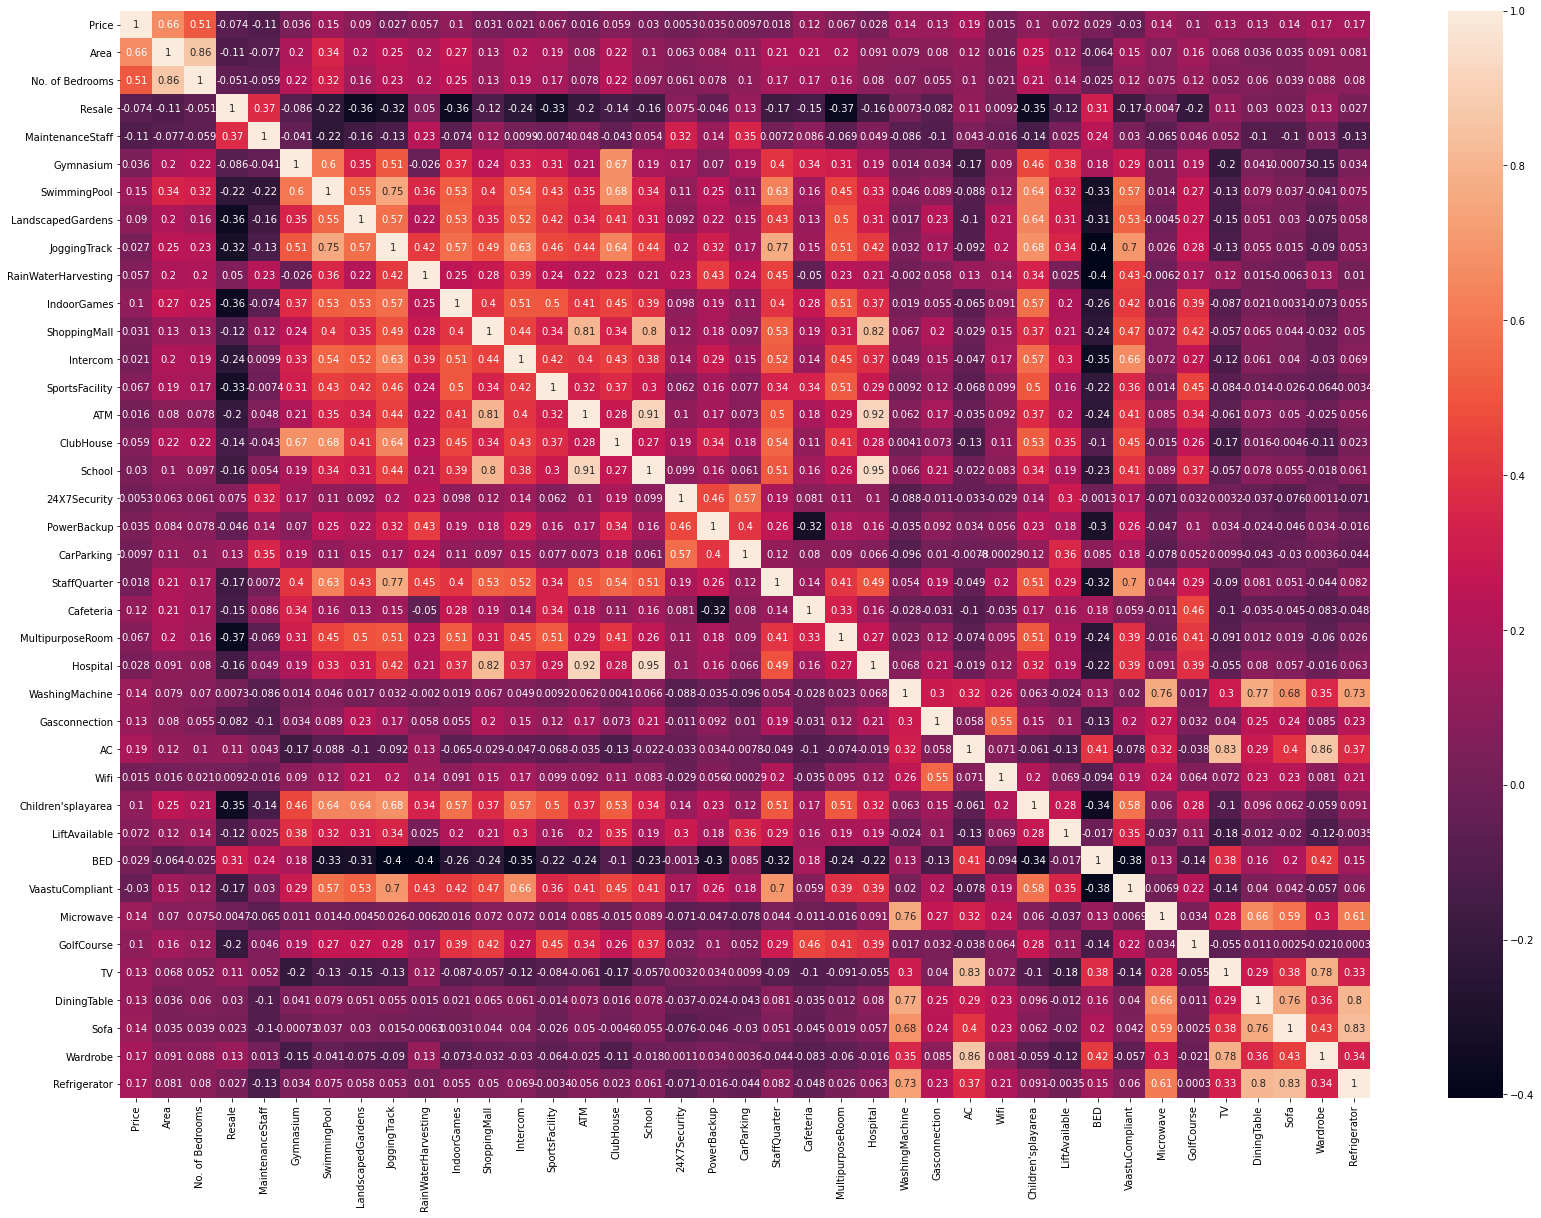

In [1221]:
corr=df1.corr()
# PLotting a heat map to better understand the correlation numbers
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()


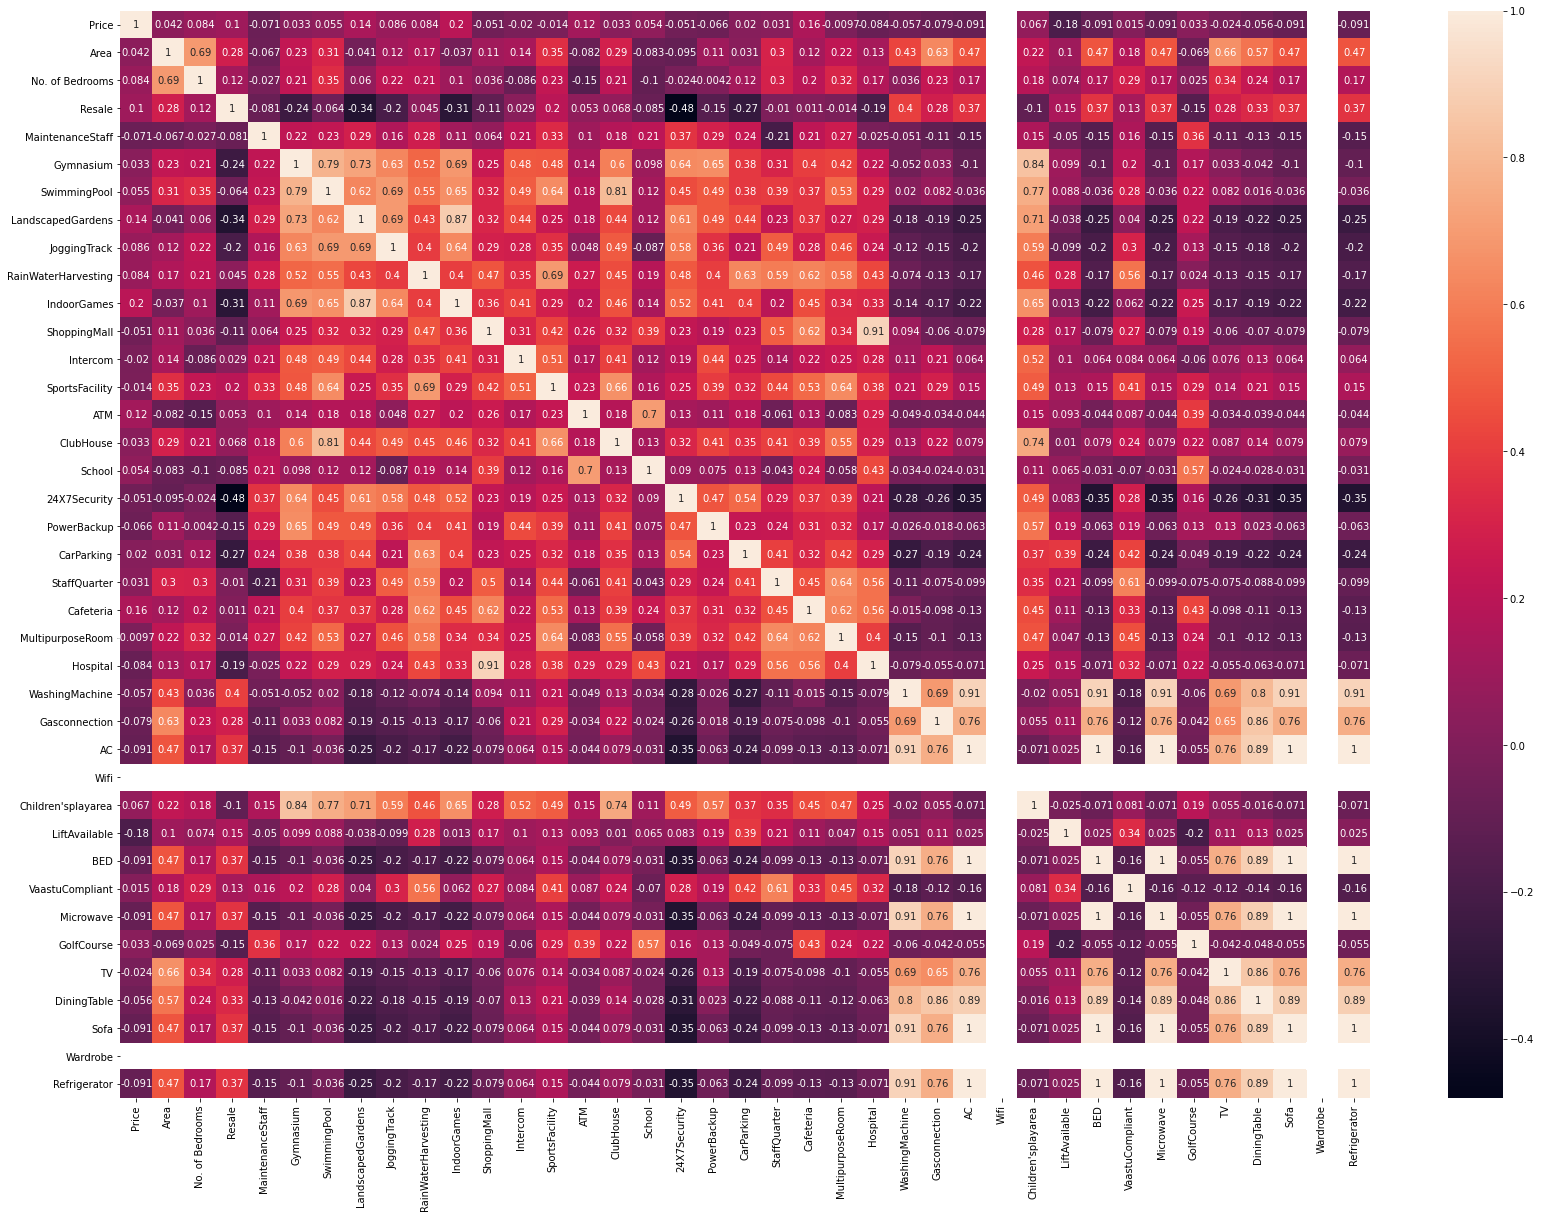

In [1223]:
corr=df2.corr()
# PLotting a heat map to better understand the correlation numbers
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()


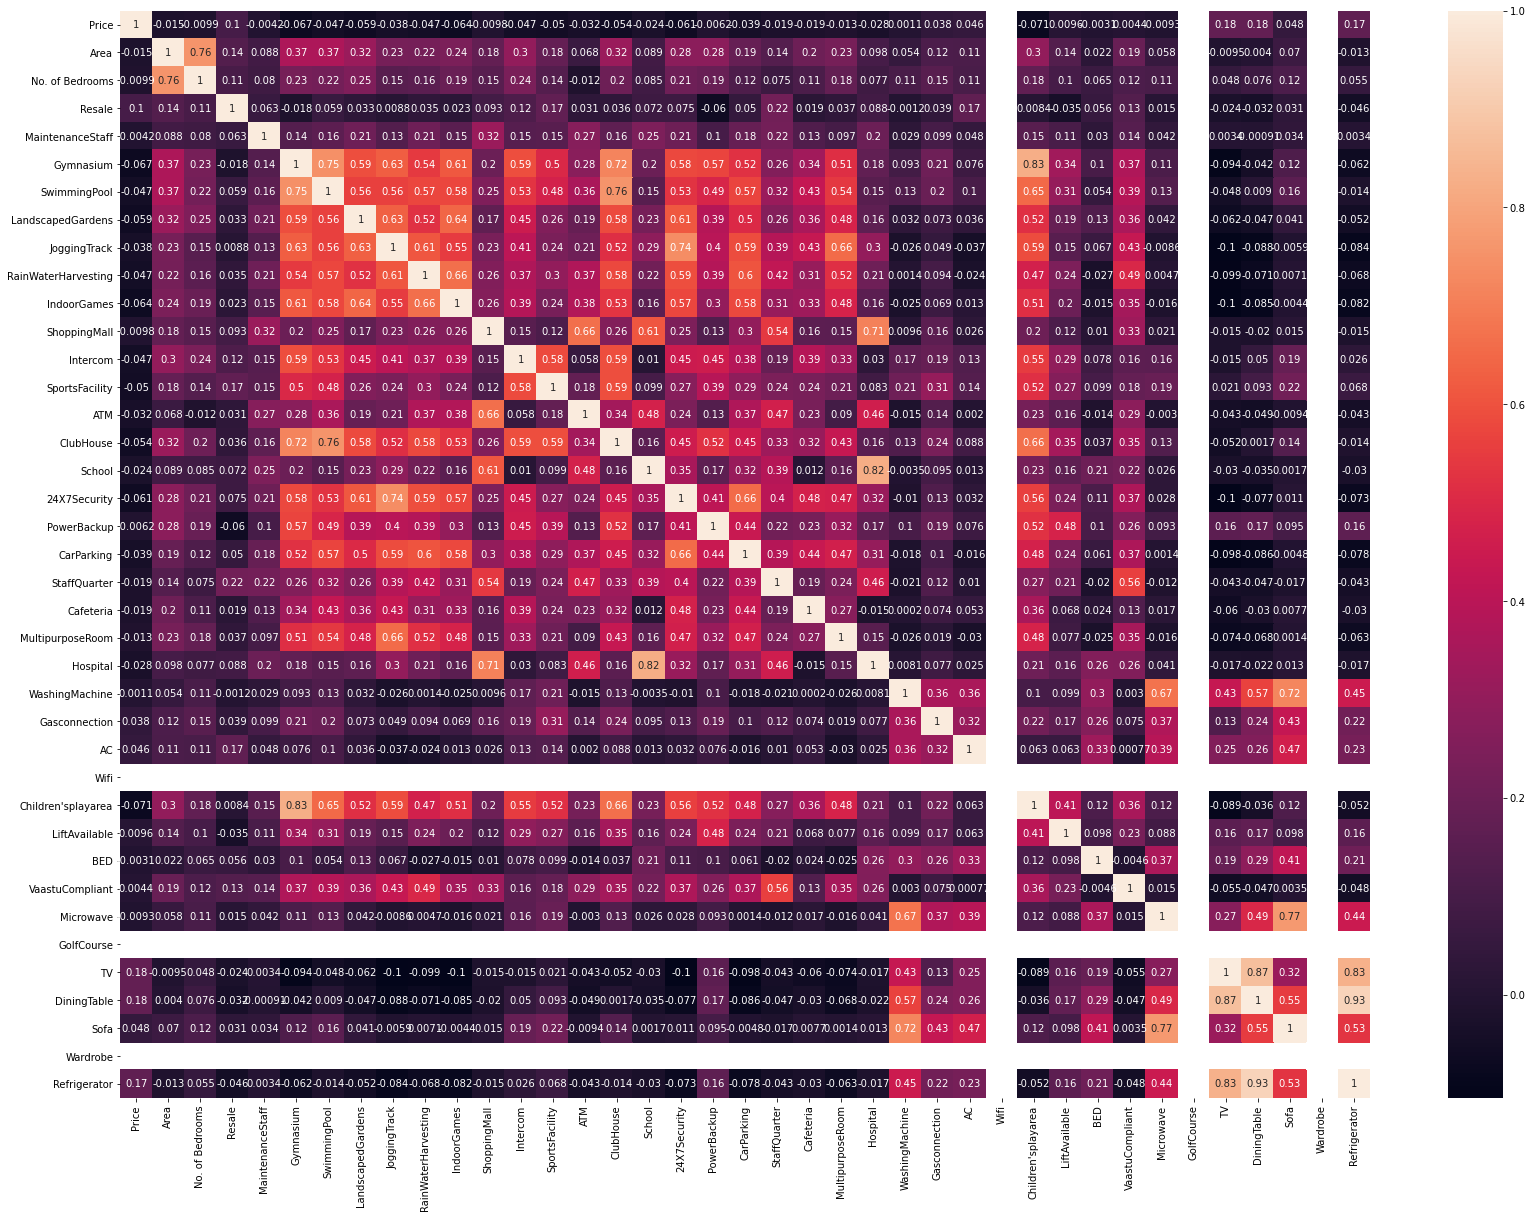

In [1225]:
corr=df3.corr()
# PLotting a heat map to better understand the correlation numbers
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()

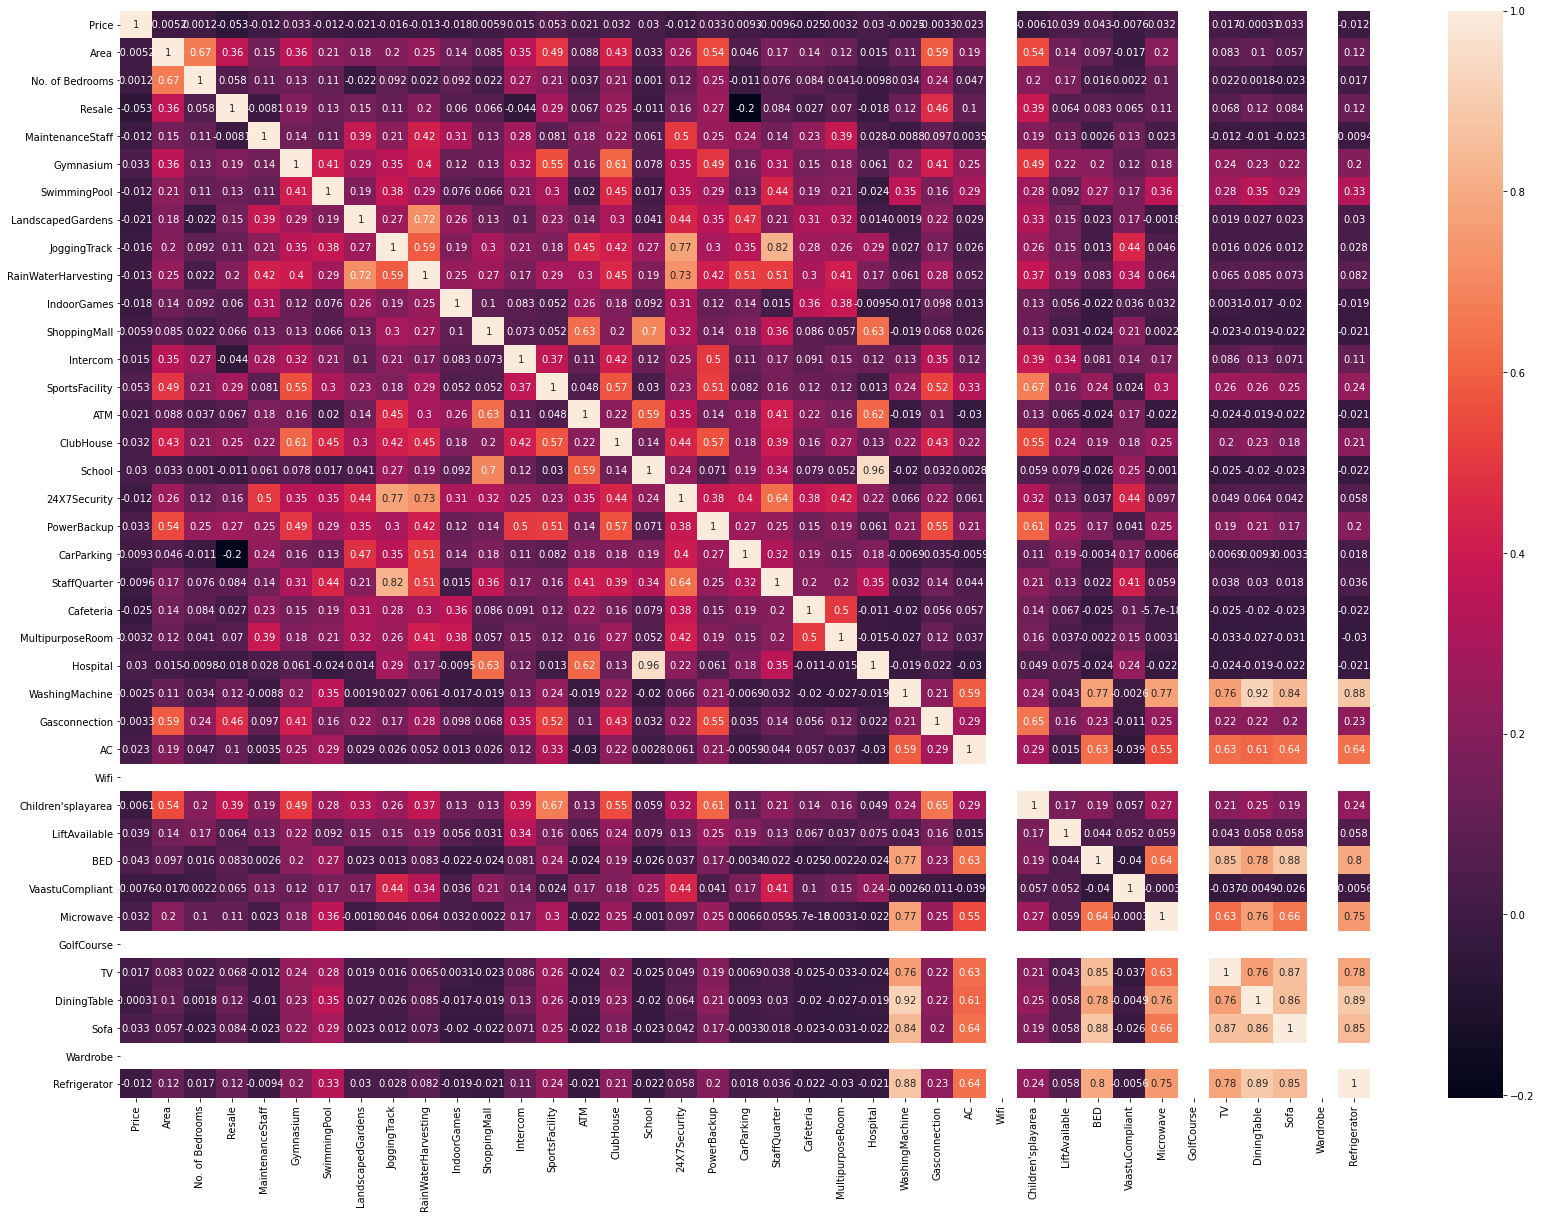

In [1227]:
corr=df4.corr()
# PLotting a heat map to better understand the correlation numbers
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()


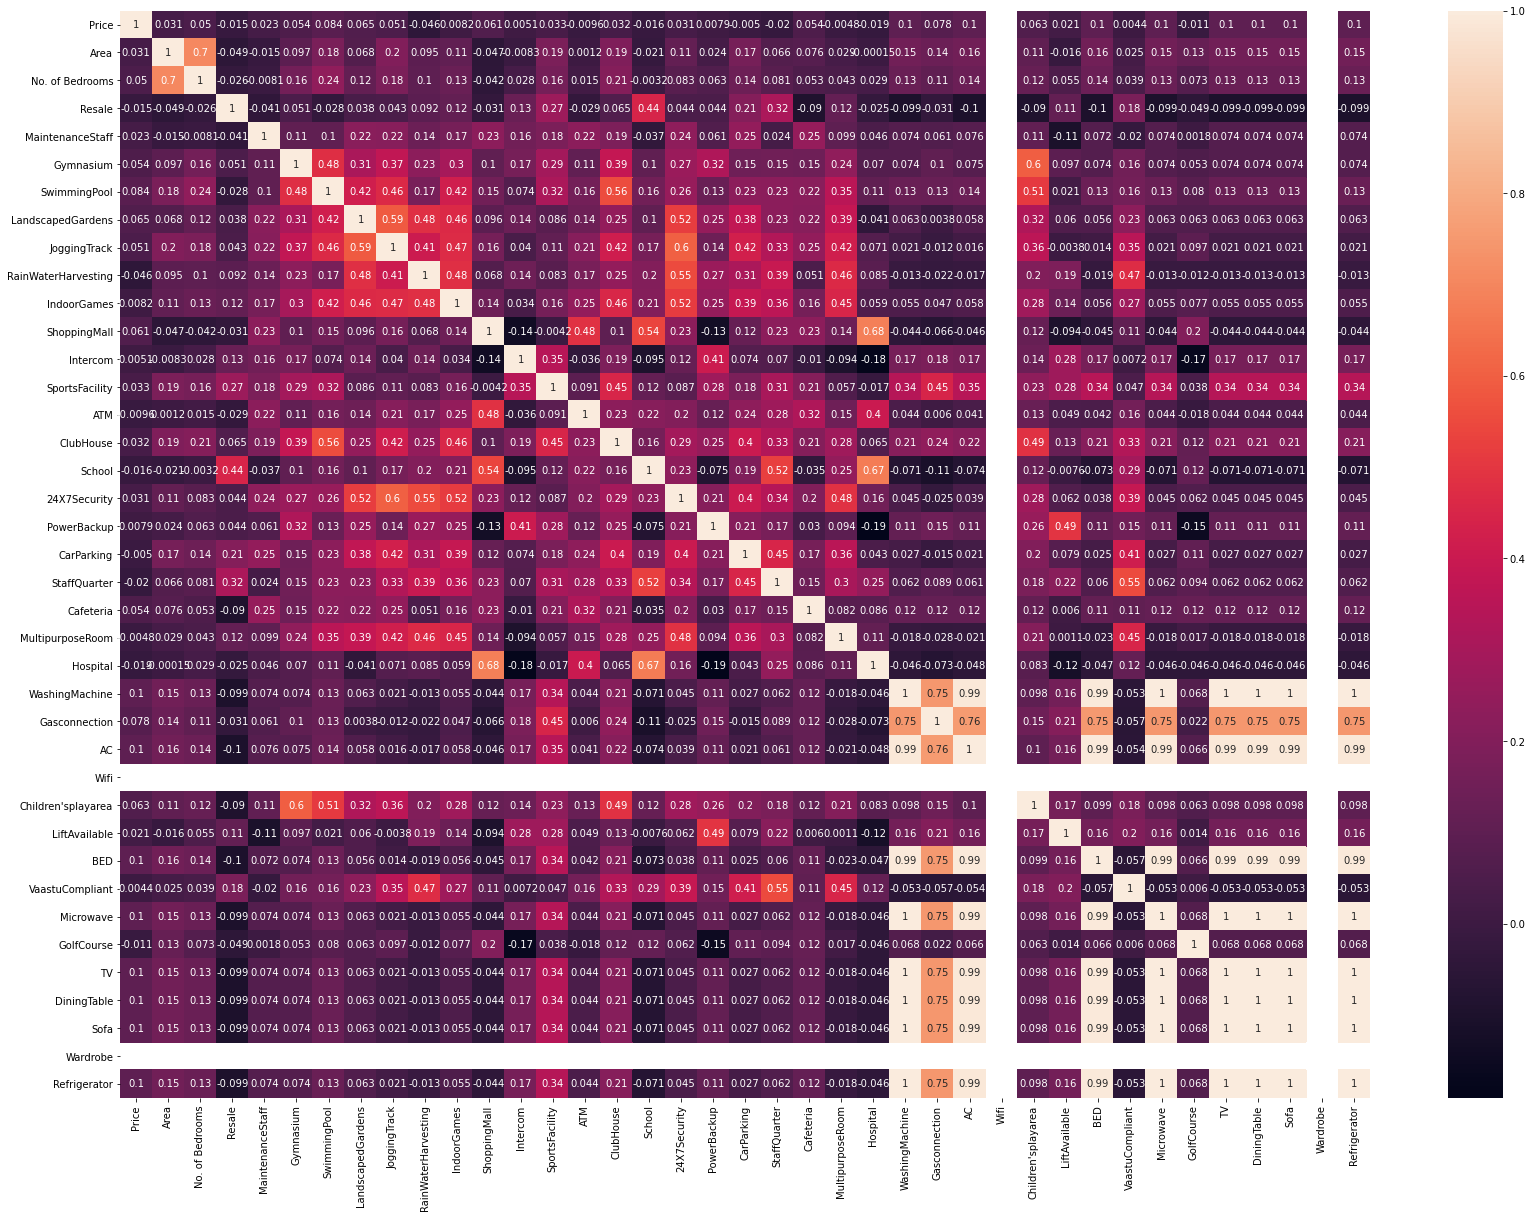

In [1229]:
corr=df5.corr()
# PLotting a heat map to better understand the correlation numbers
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()


In [1285]:
frames = [df1,df2,df3,df4,df5]
merged = pd.concat(frames,axis=0)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [1286]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()

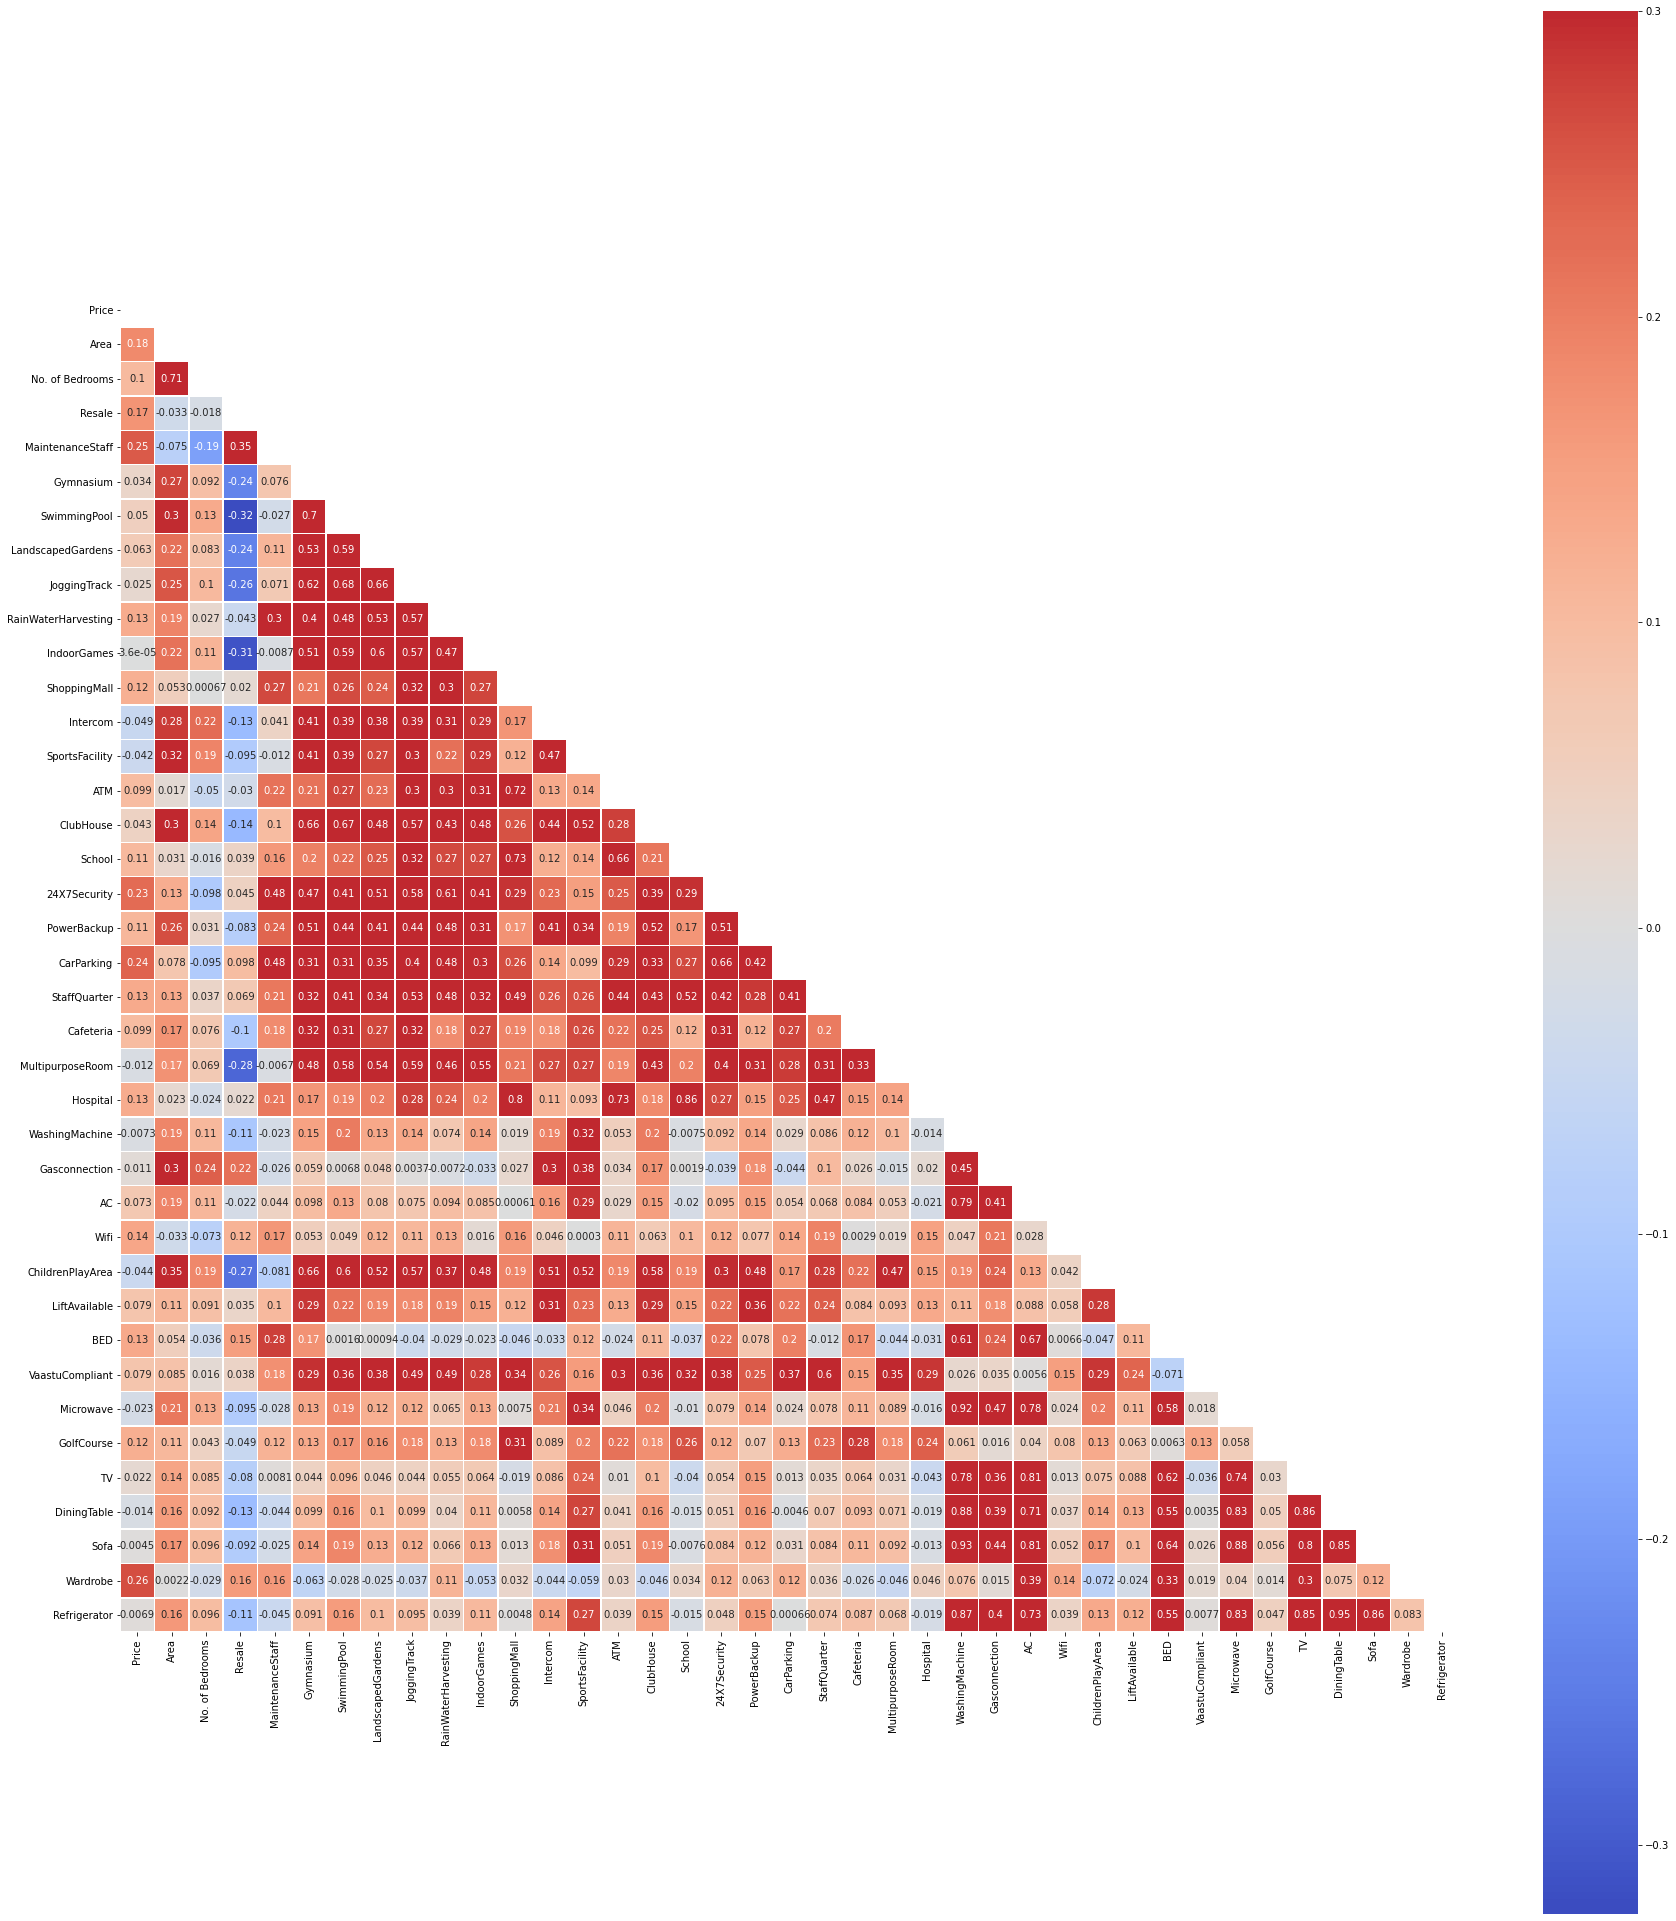

In [1287]:
plt.figure(figsize=(30,35))
corr=merged.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(merged.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

# Model Building 

C:\Users\Arkaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass n_features_to_select=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



Fitting 10 folds for each of 7 candidates, totalling 70 fits


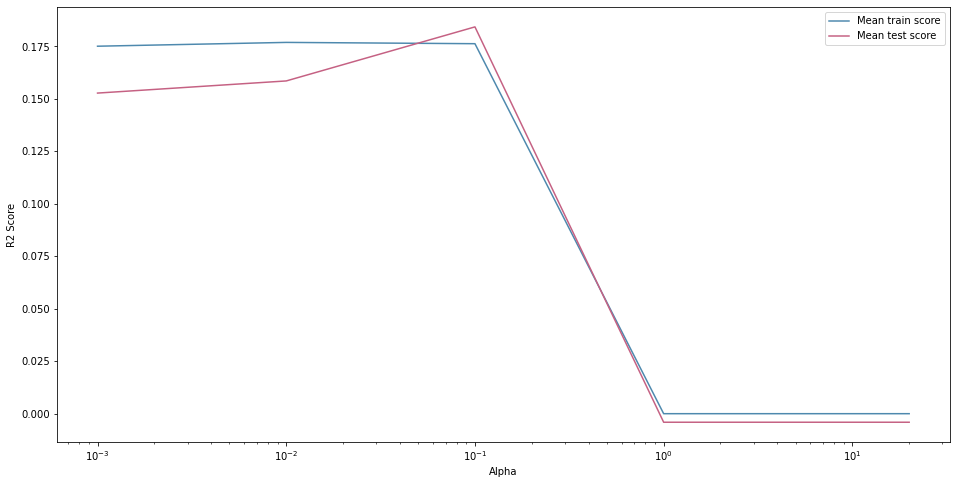

Feature  Coefficient Value
35           Wardrobe         159.580352
31         GolfCourse          44.214742
16       24X7Security          36.430958
3    MaintenanceStaff          34.337991
26               Wifi          28.240370
18         CarParking          22.928196
22           Hospital          15.678742
27      LiftAvailable          11.346531
19       StaffQuarter          11.323459
2              Resale           9.142554
5        SwimmingPool           8.069289
20          Cafeteria           7.766933
1     No. of Bedrooms           4.278351
0                Area           0.047379
14          ClubHouse          -0.000000
15             School           0.000000
4           Gymnasium          -0.000000
34               Sofa          -0.000000
33        DiningTable          -0.000000
6   LandscapedGardens           0.000000

In [1293]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

X = merged[feature_names]
y = merged['Price']

train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.3, random_state=101)
lm  = LinearRegression()
lm.fit(train_X,train_y)
rfe = RFE(lm, 100) #with 100 features
rfe.fit(train_X,train_y)

list(zip(train_X.columns, rfe.support_, rfe.ranking_))

rfe_scores = pd.DataFrame(list(zip(train_X.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
train_X = train_X[rfe_sel_columns]
val_X = val_X[rfe_sel_columns]


#Applying K-Fold Cross validation and building a Lasso Regression model
folds = KFold(n_splits=10, shuffle=True, random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0, 20.0]}

model = Lasso(normalize=True, tol=1+500)

model_cv_lasso = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv_lasso.fit(train_X,train_y)

cv_result_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_lasso.transpose()

plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['Mean train score', 'Mean test score'], loc='upper right')
plt.show()

model_cv_lasso.best_params_

#Building a Lasso Regression Model with alpha = 0.001

lm_lasso = Lasso(alpha=1.0)
lm_lasso.fit(train_X,train_y)

train_y_pred = lm_lasso.predict(train_X)
# print(r2_score(y_true=train_y,y_pred=train_y_pred))
val_y_pred  = lm_lasso.predict(val_X)
# print(r2_score(y_true=val_y,y_pred=val_y_pred))

model_param = list(lm_lasso.coef_)
cols = train_X.columns
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coefficient Value']

lasso_coef.sort_values(by='Coefficient Value',ascending=False).head(20)




Also to list out the top features based on our analysis which would help us make the best decisions are -

Area
Resale
SwimmingPool	
Cafeteria	
No. of Bedrooms	
Wardrobe	
GolfCourse	
24X7Security	
MaintenanceStaff	
Wifi	
CarParking	
Hospital	
LiftAvailable	
StaffQuarter	
